# Introduction

This notebook demonstrates the full workflow for developing a License Plate Detector using the YOLOv8 object detection model.

This project focuses on:
- Loading and preparing a dataset of vehicle images containing license plates  
- Fine-tuning a YOLOv8 model using the Ultralytics training pipeline  
- Evaluating the model with standard metrics such as mAP, Precision, and Recall  
- Generating predictions and visualizing detection results


# Install Dependencies

In this step, we install YOLOv8, Roboflow, and essential Python libraries used for training and image processing.

In [1]:
!pip install ultralytics roboflow opencv-python matplotlib

# Import Libraries

We import all required packages including Ultralytics YOLO, Roboflow API utilities, OpenCV, and visualization tools.

In [2]:
from ultralytics import YOLO
from roboflow import Roboflow
import cv2
import matplotlib.pyplot as plt
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Download Dataset

The dataset is downloaded automatically using the Roboflow API. This ensures reproducibility and removes the need for manual uploads.

In [22]:
rf = Roboflow(api_key="xcLpLcov5S0yjHXlnRgK")
project = rf.workspace("hcc-0e4mo").project("license-plate-recognition-rxg4e-samkt")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


# Train YOLOv8n

Here we fine-tune a YOLOv8n (nano) model using fast training settings compatible with Google Colab’s free GPU limits.

In [20]:
model = YOLO("yolov8n.pt")

results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=3,
    imgsz=416,
    batch=8
)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

# Evaluate Model Performance

After training, we run model validation to obtain performance metrics such as mAP50, Precision, Recall, and loss curves.

In [12]:
metrics = model.val()
metrics_dict = metrics.results_dict
metrics_dict

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1222.4±638.4 MB/s, size: 29.1 KB)
val: Scanning /content/License-Plate-Recognition-1/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2048/2048 3.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 128/128 9.6it/s 13.3s
                   all       2048       2195      0.905      0.881      0.892      0.586
Speed: 0.4ms preprocess, 1.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/runs/detect/val2


{'metrics/precision(B)': 0.9045897078541533,
 'metrics/recall(B)': 0.8811545163782943,
 'metrics/mAP50(B)': 0.8917370472152344,
 'metrics/mAP50-95(B)': 0.5859516847033878,
 'fitness': 0.5859516847033878}

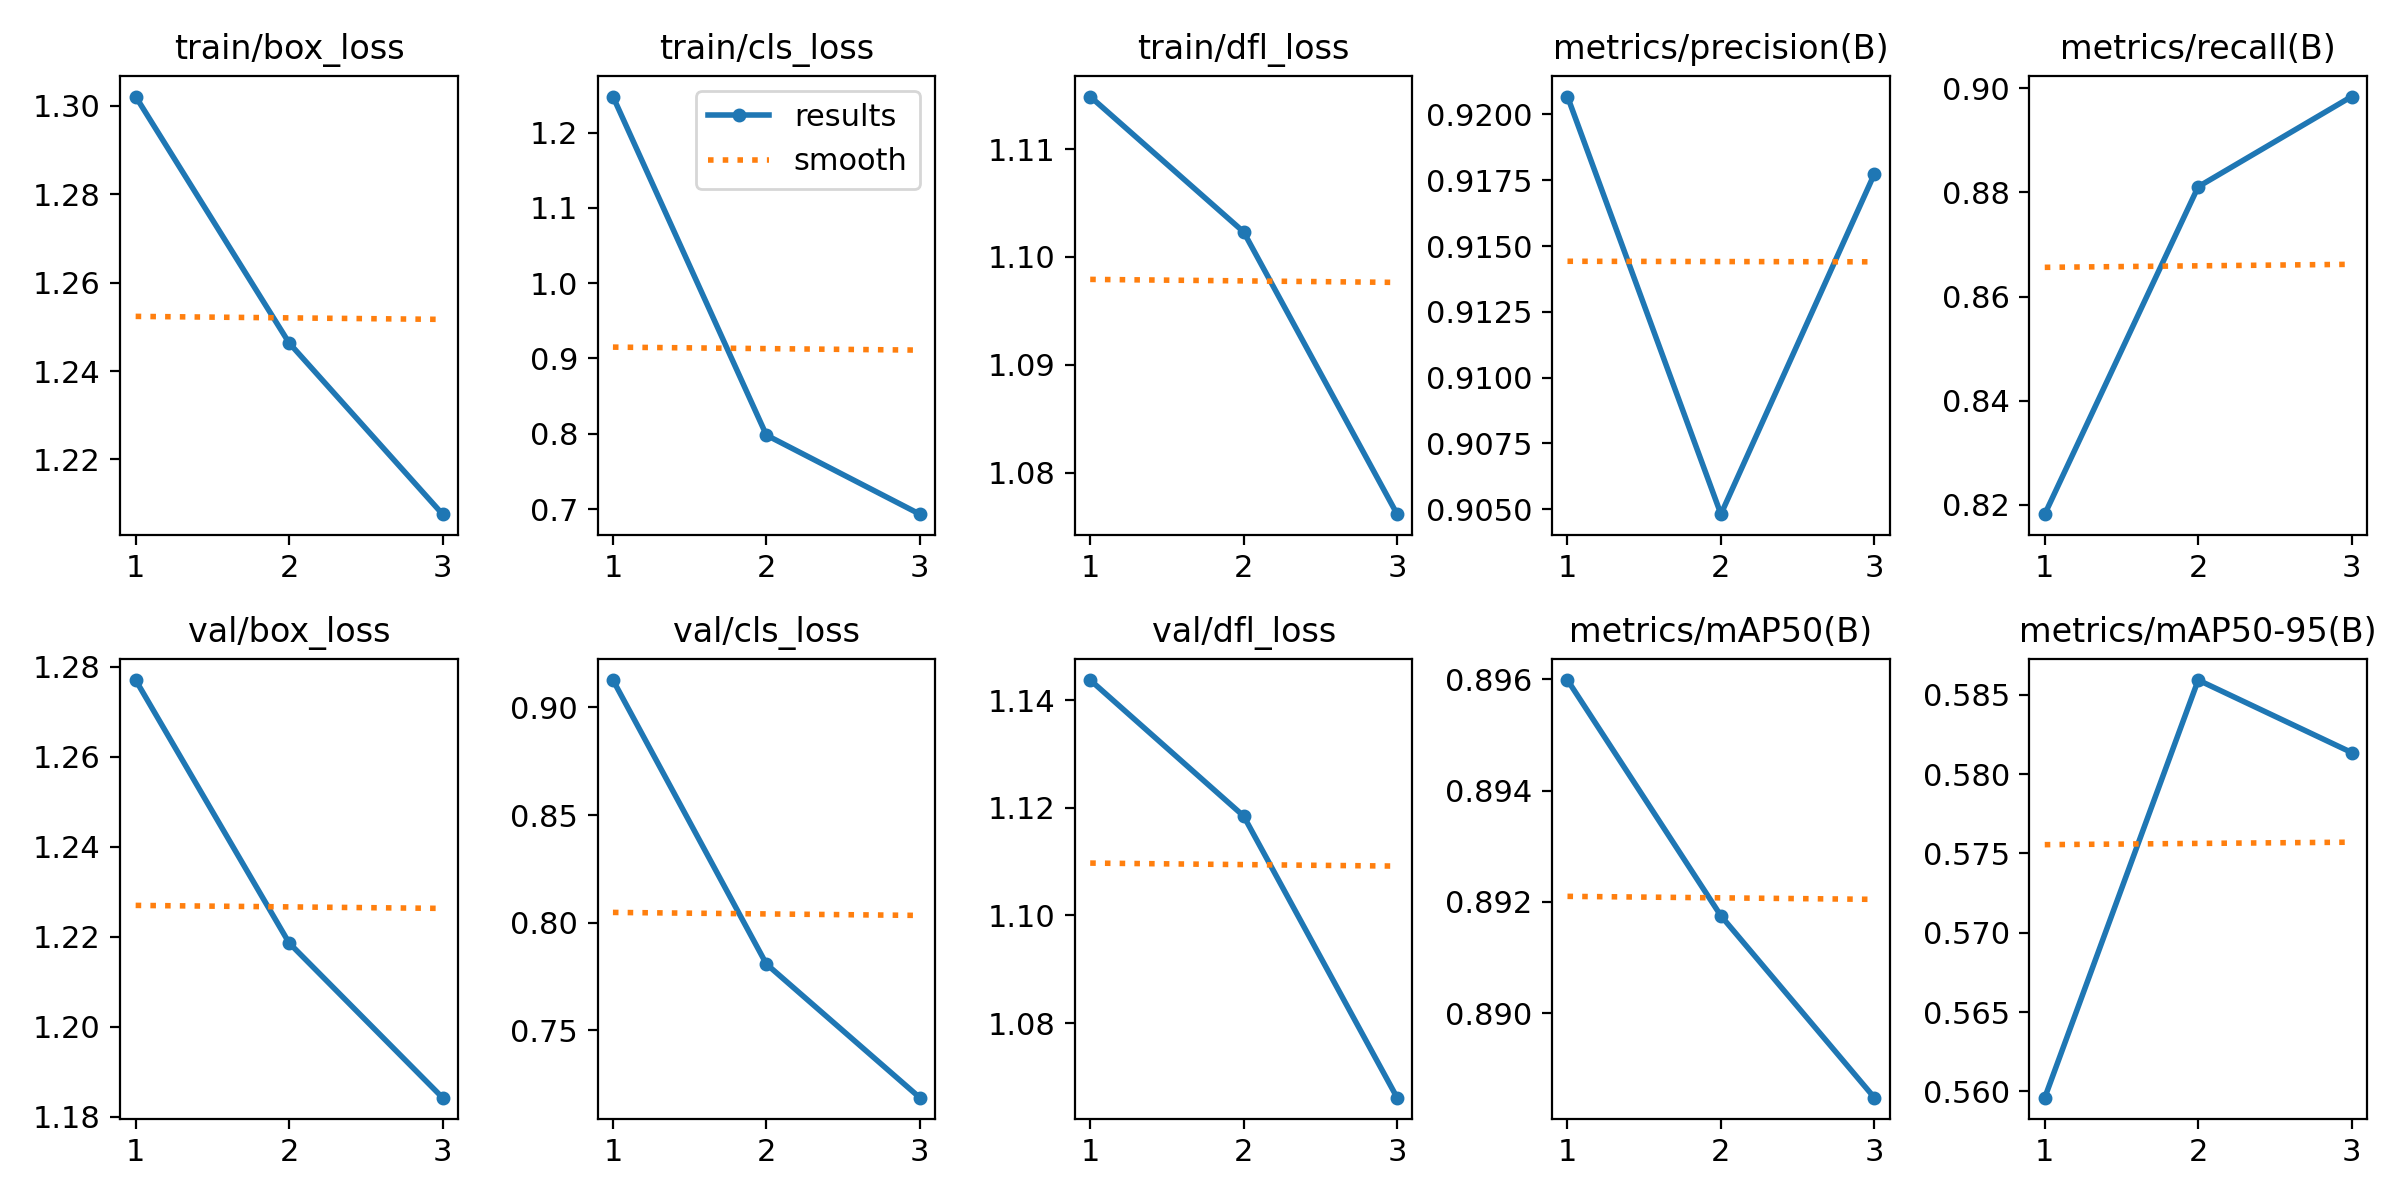

In [13]:
from IPython.display import Image
Image(filename='runs/detect/train/results.png', width=600)

# Run Predictions on Test Images

In this section, we test the trained model on sample images and save the predicted results.

In [16]:
import glob

test_images = glob.glob(f"/content/{dataset.location}/test/*.jpg")[:5]

for img in test_images:
    result = model.predict(img, save=True)
    print("Predicted:", img)

# Visualize Prediction

This step displays the output images generated by the model with detected license plates highlighted using bounding boxes.

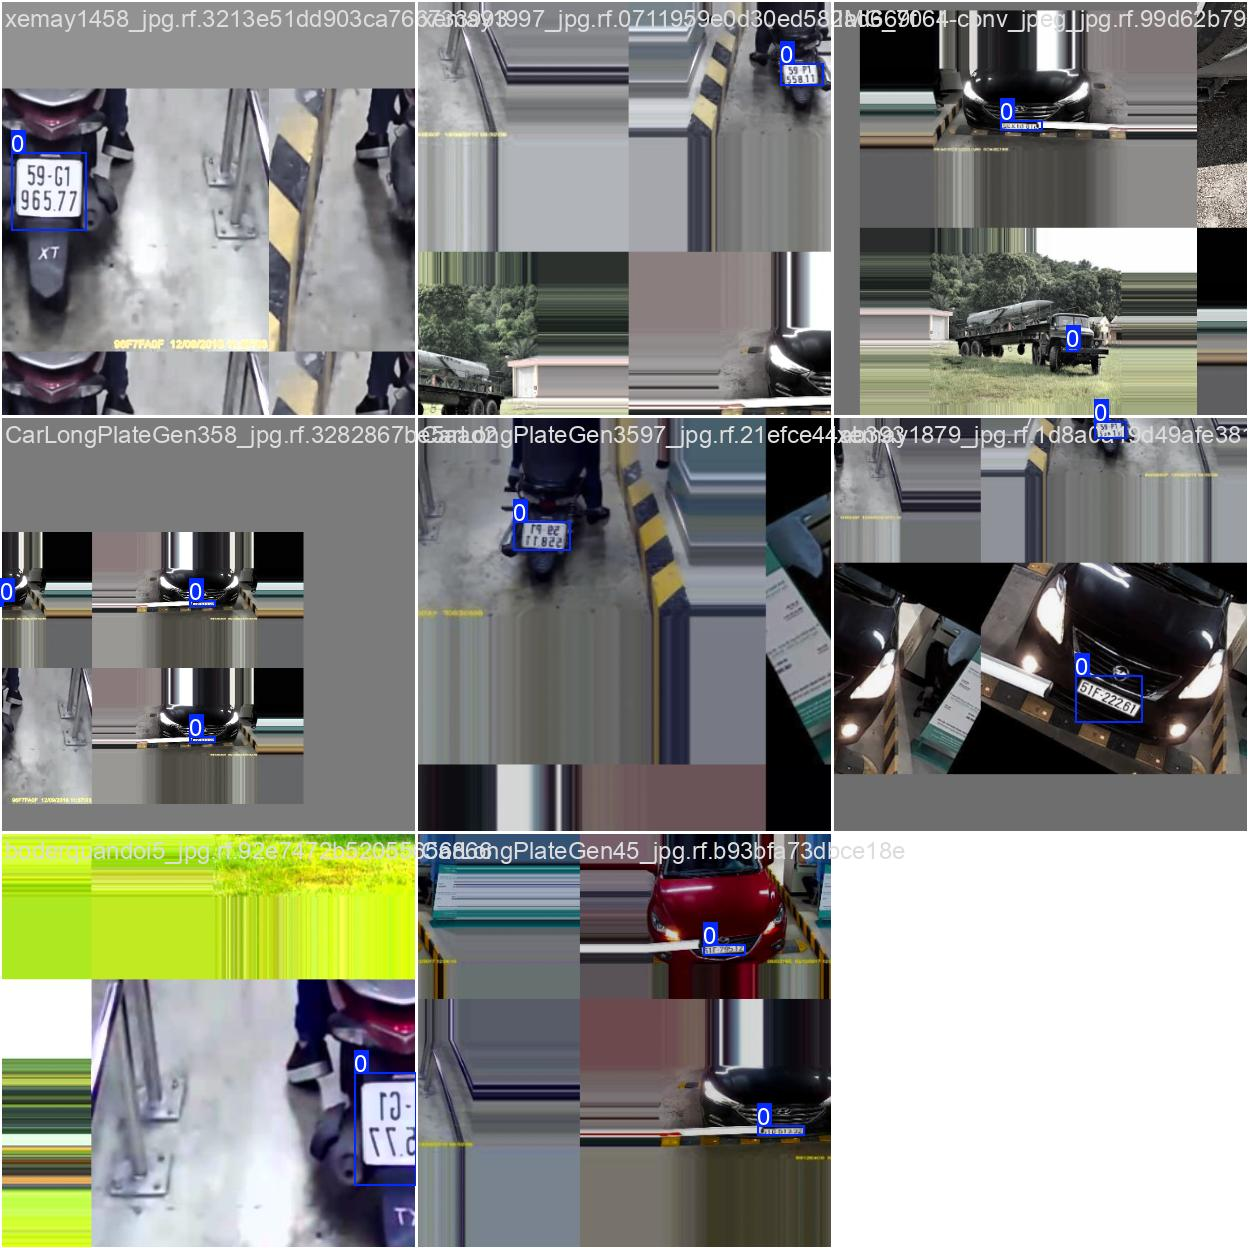

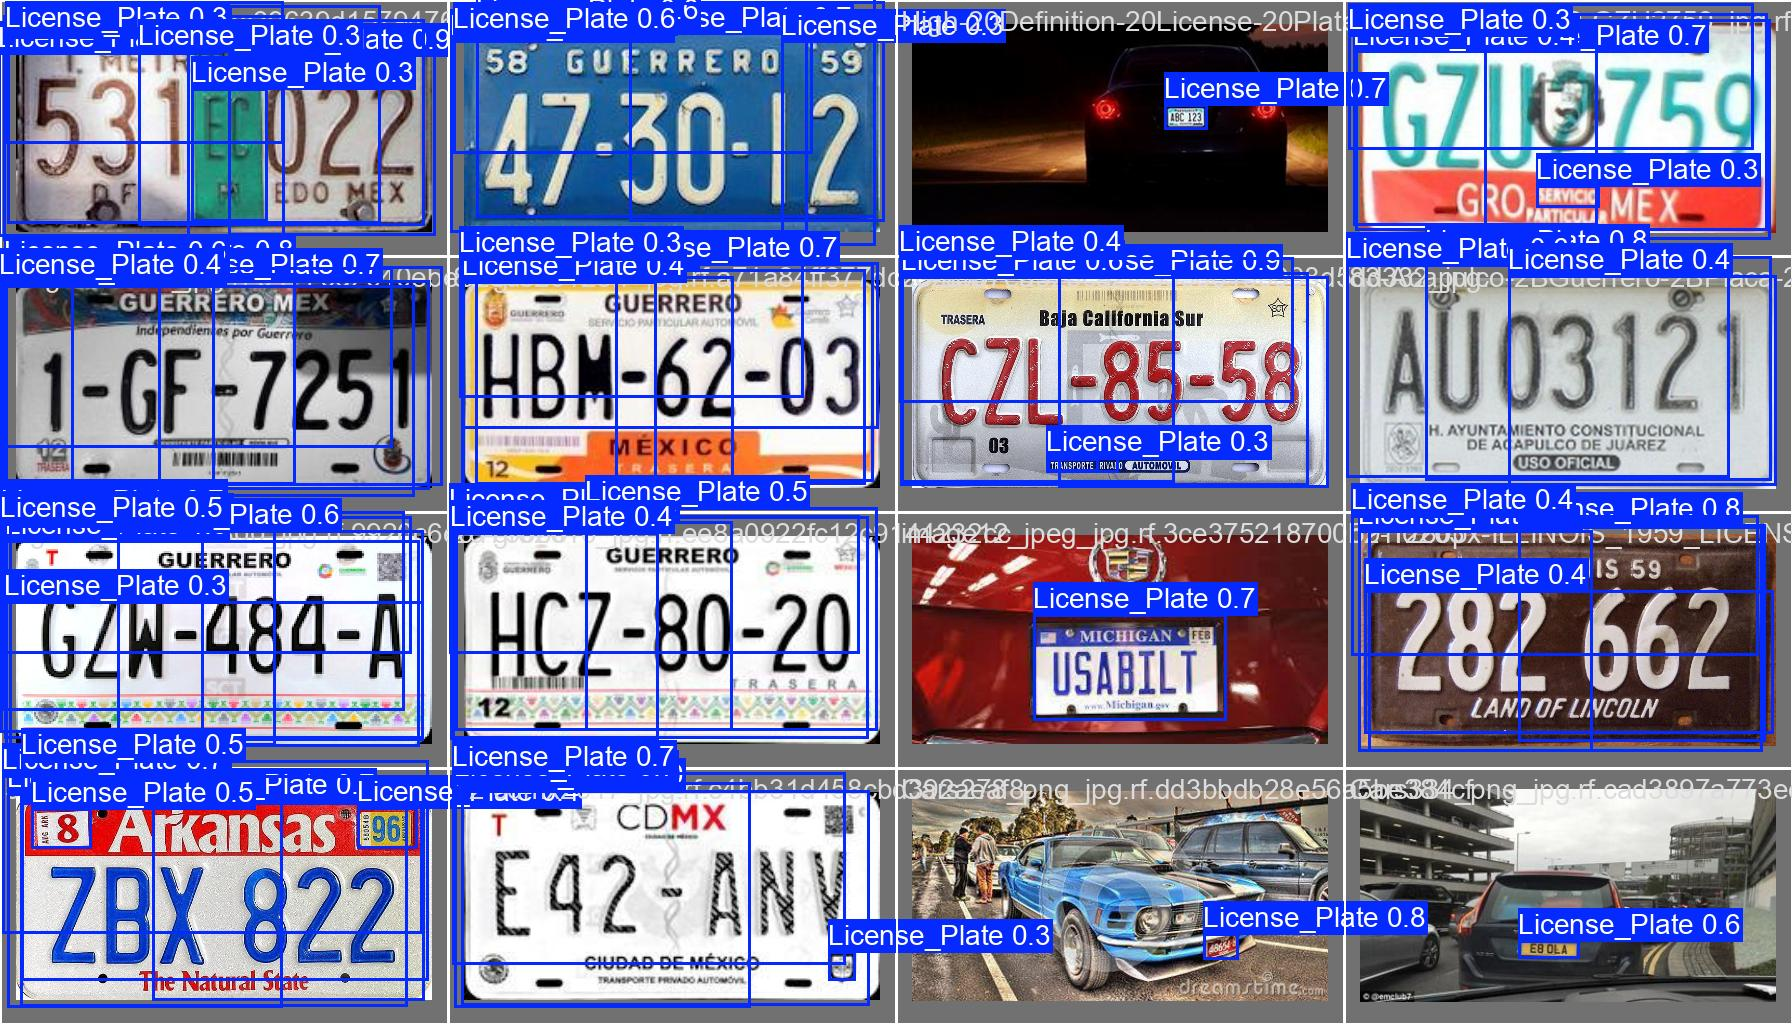

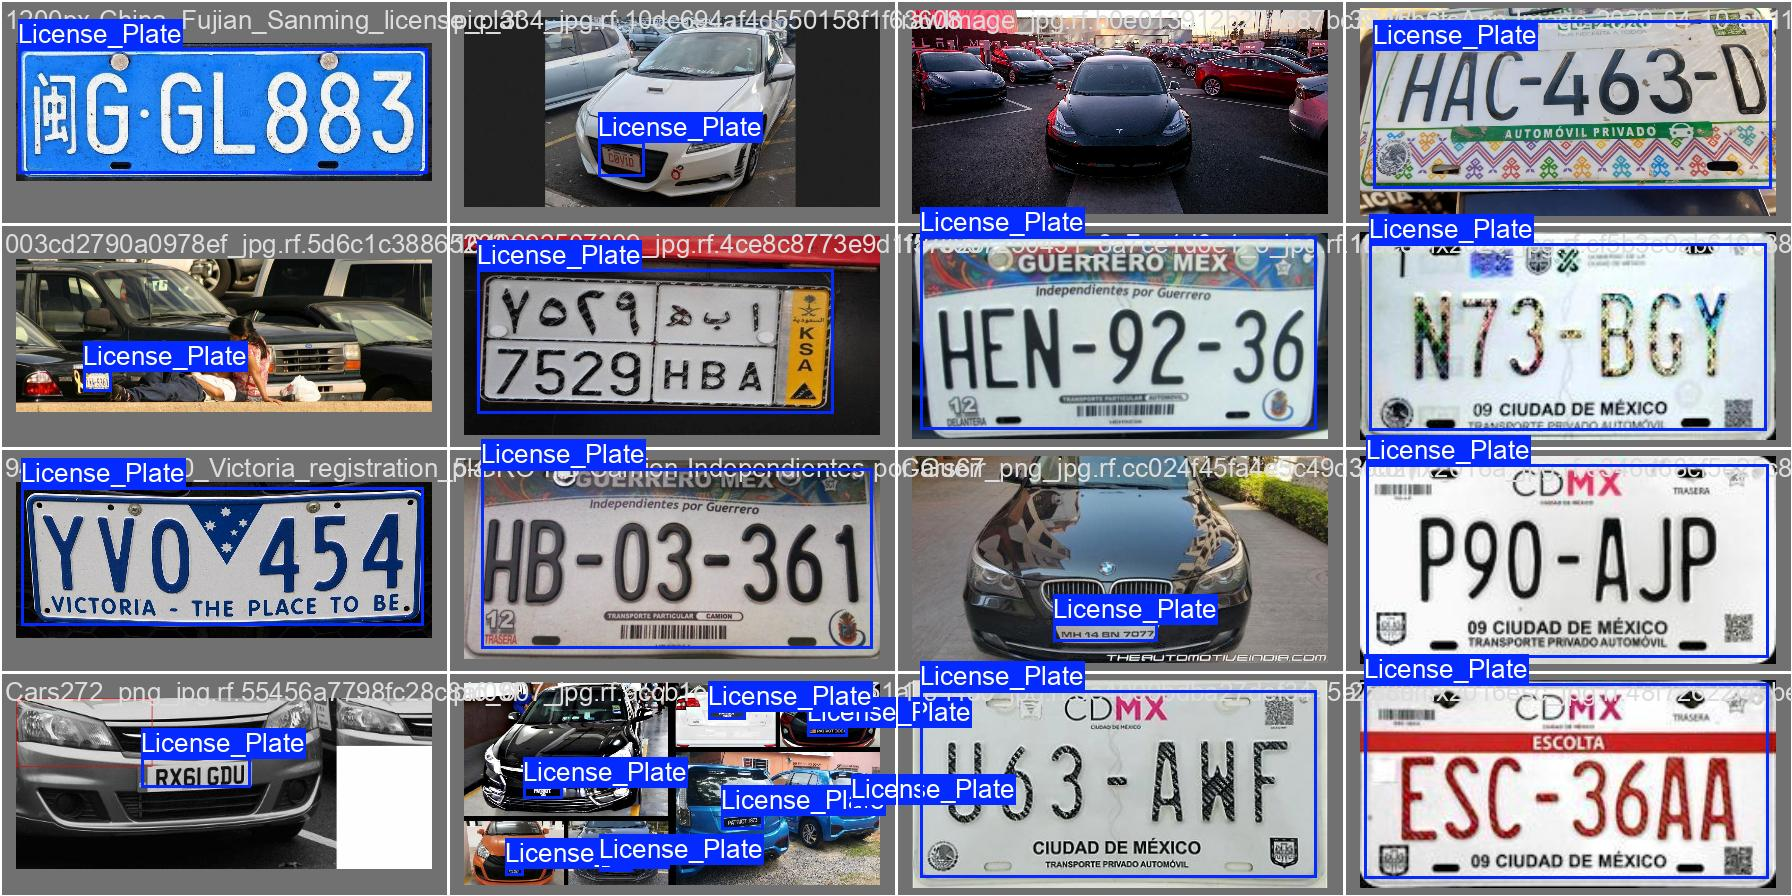

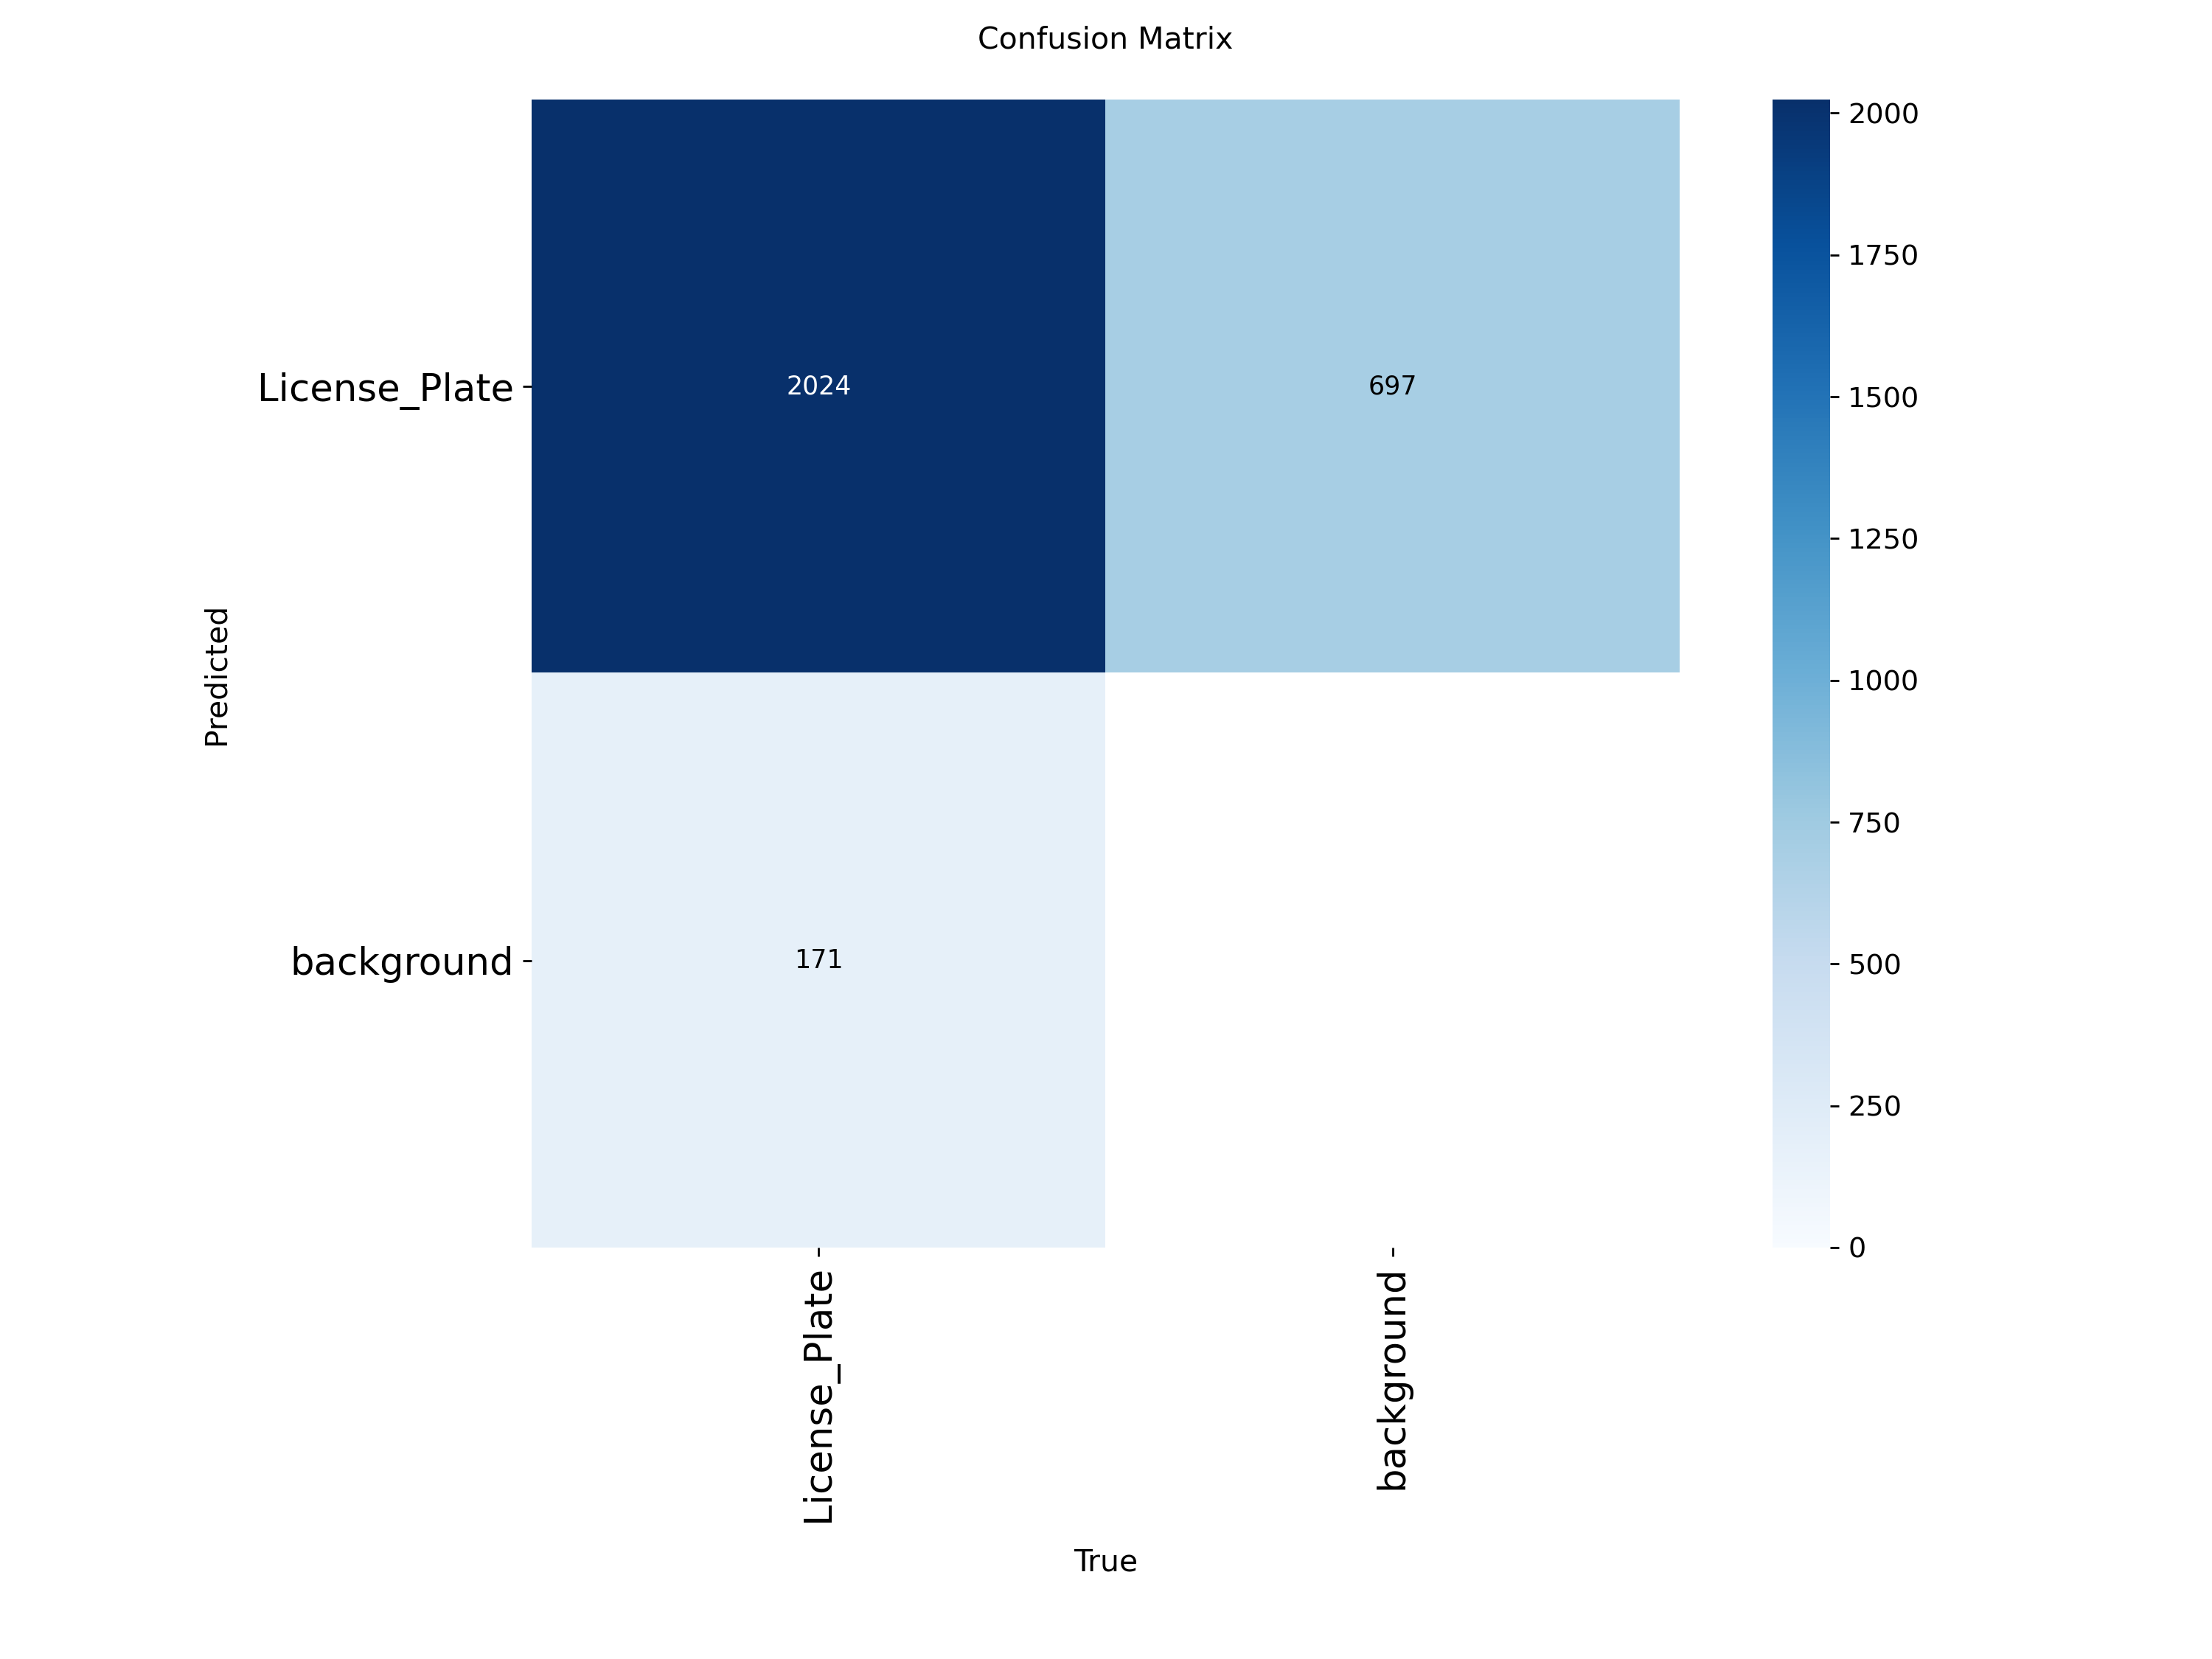

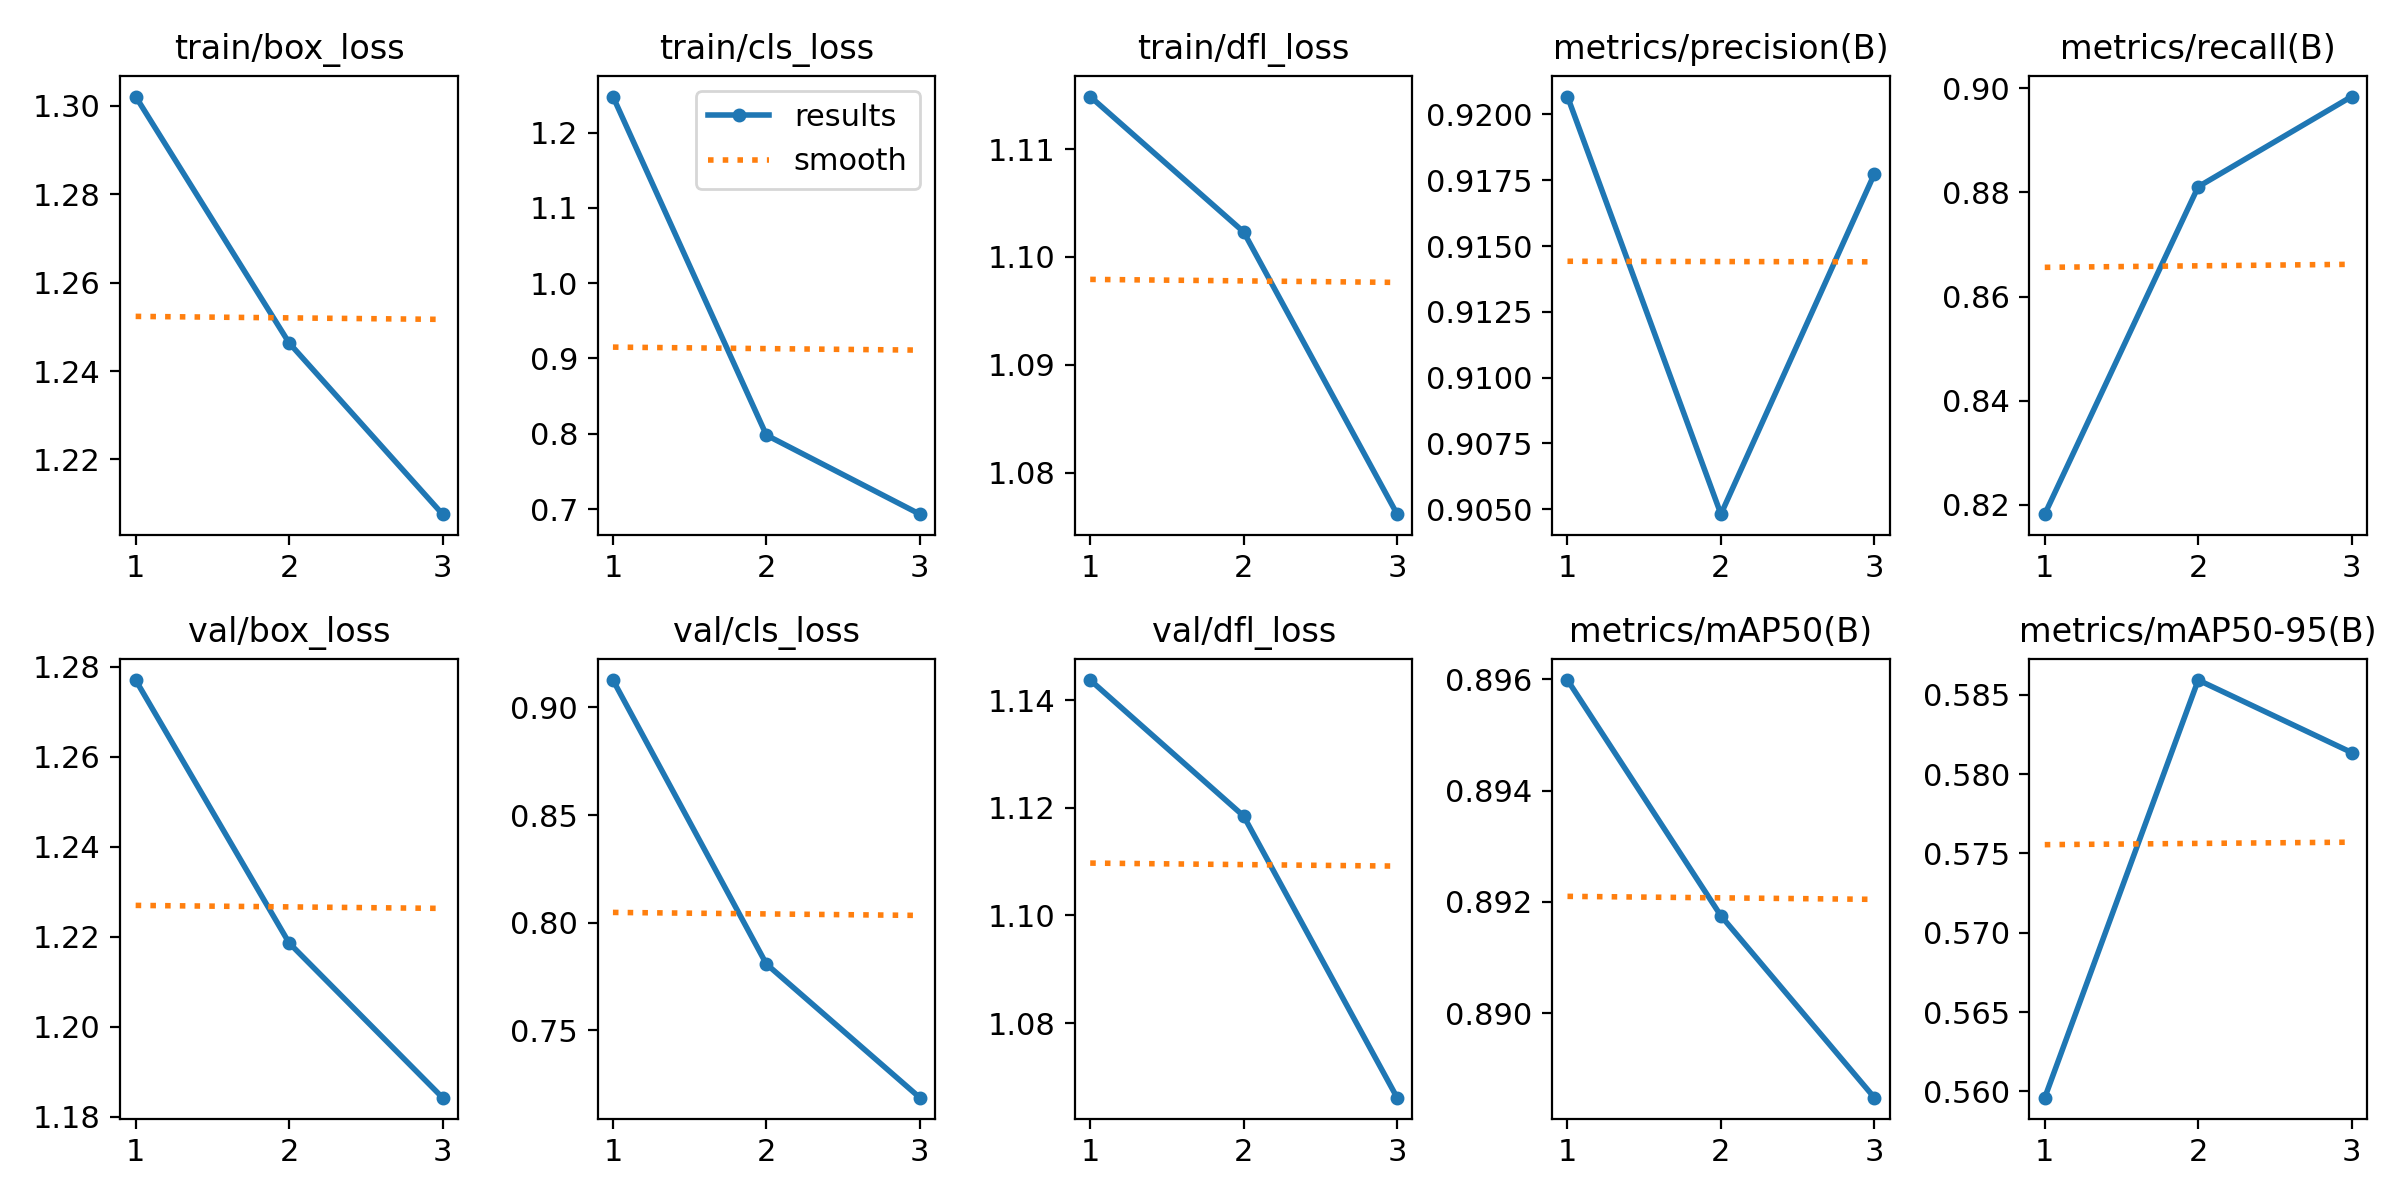

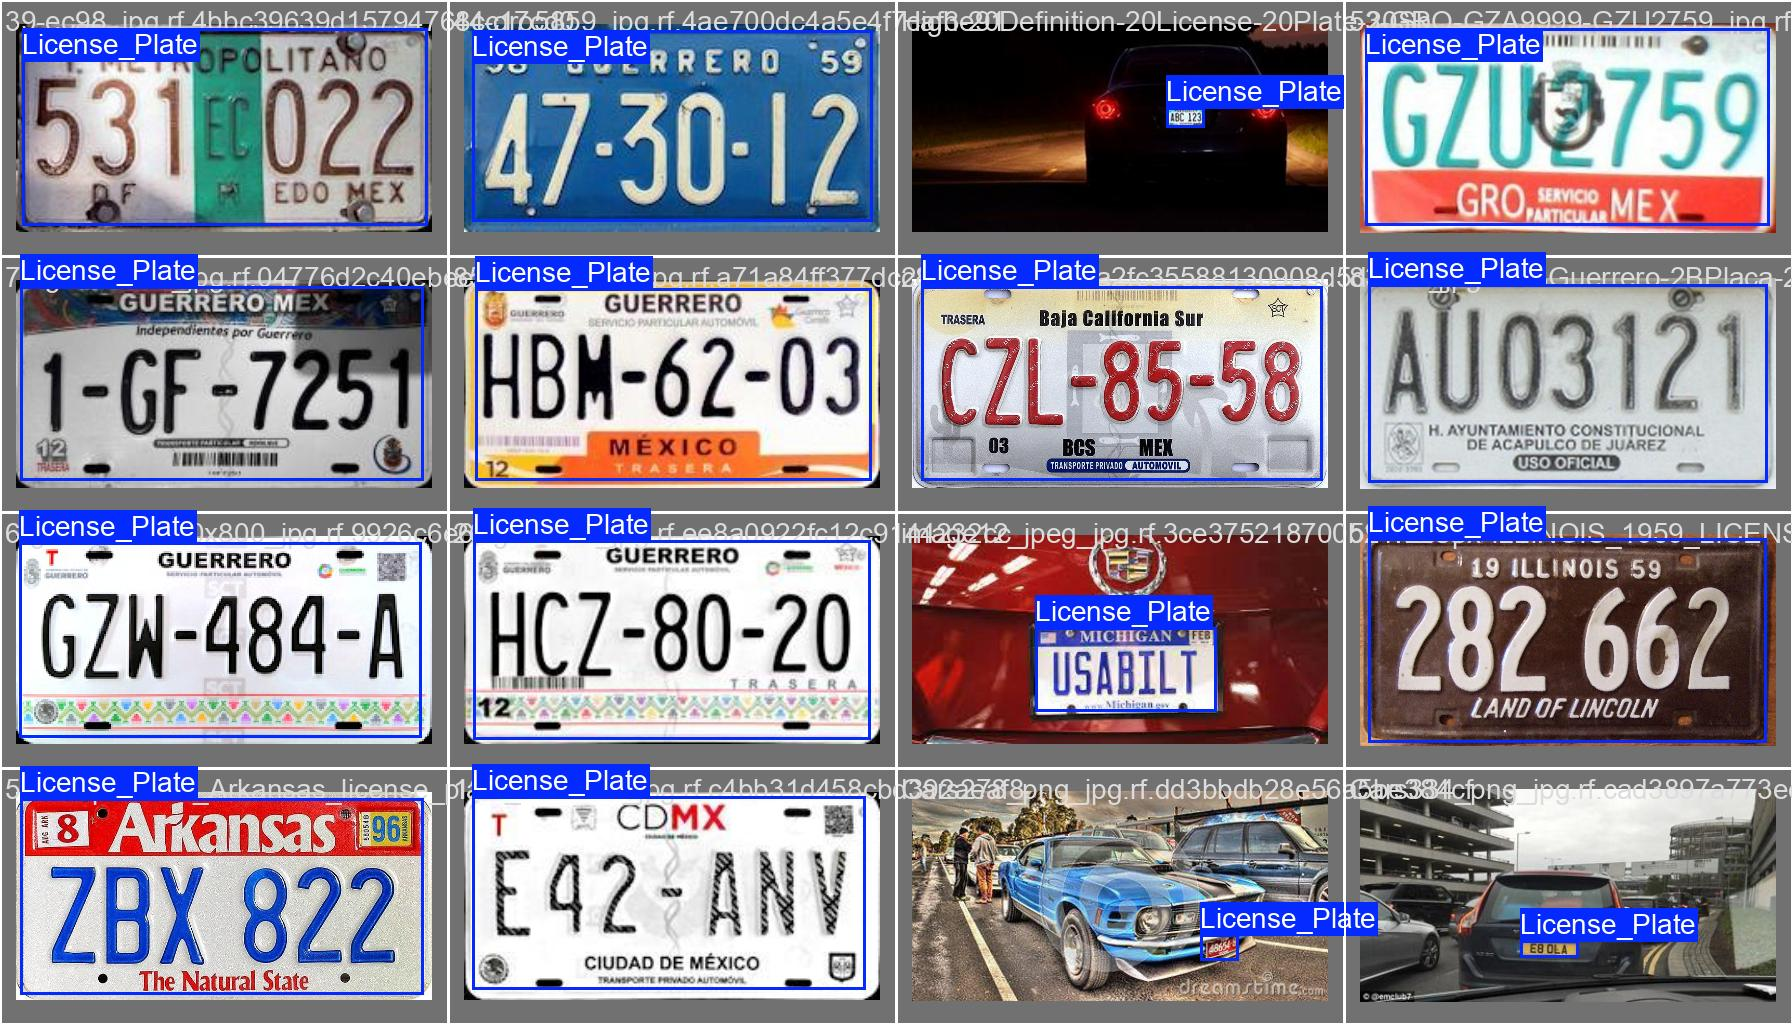

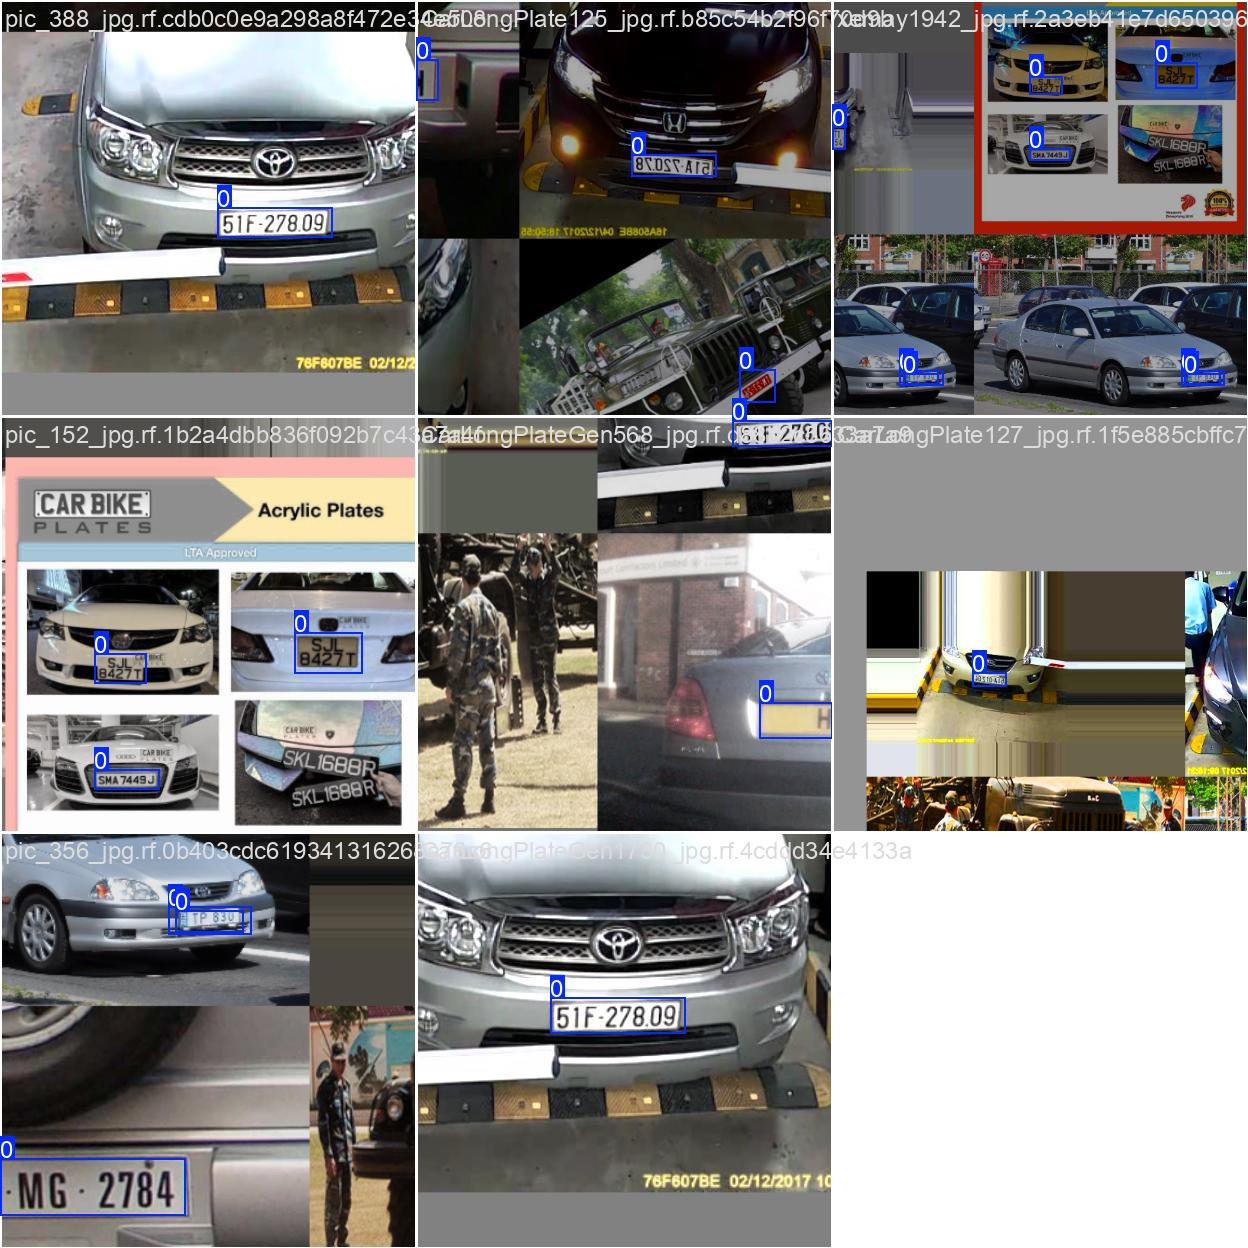

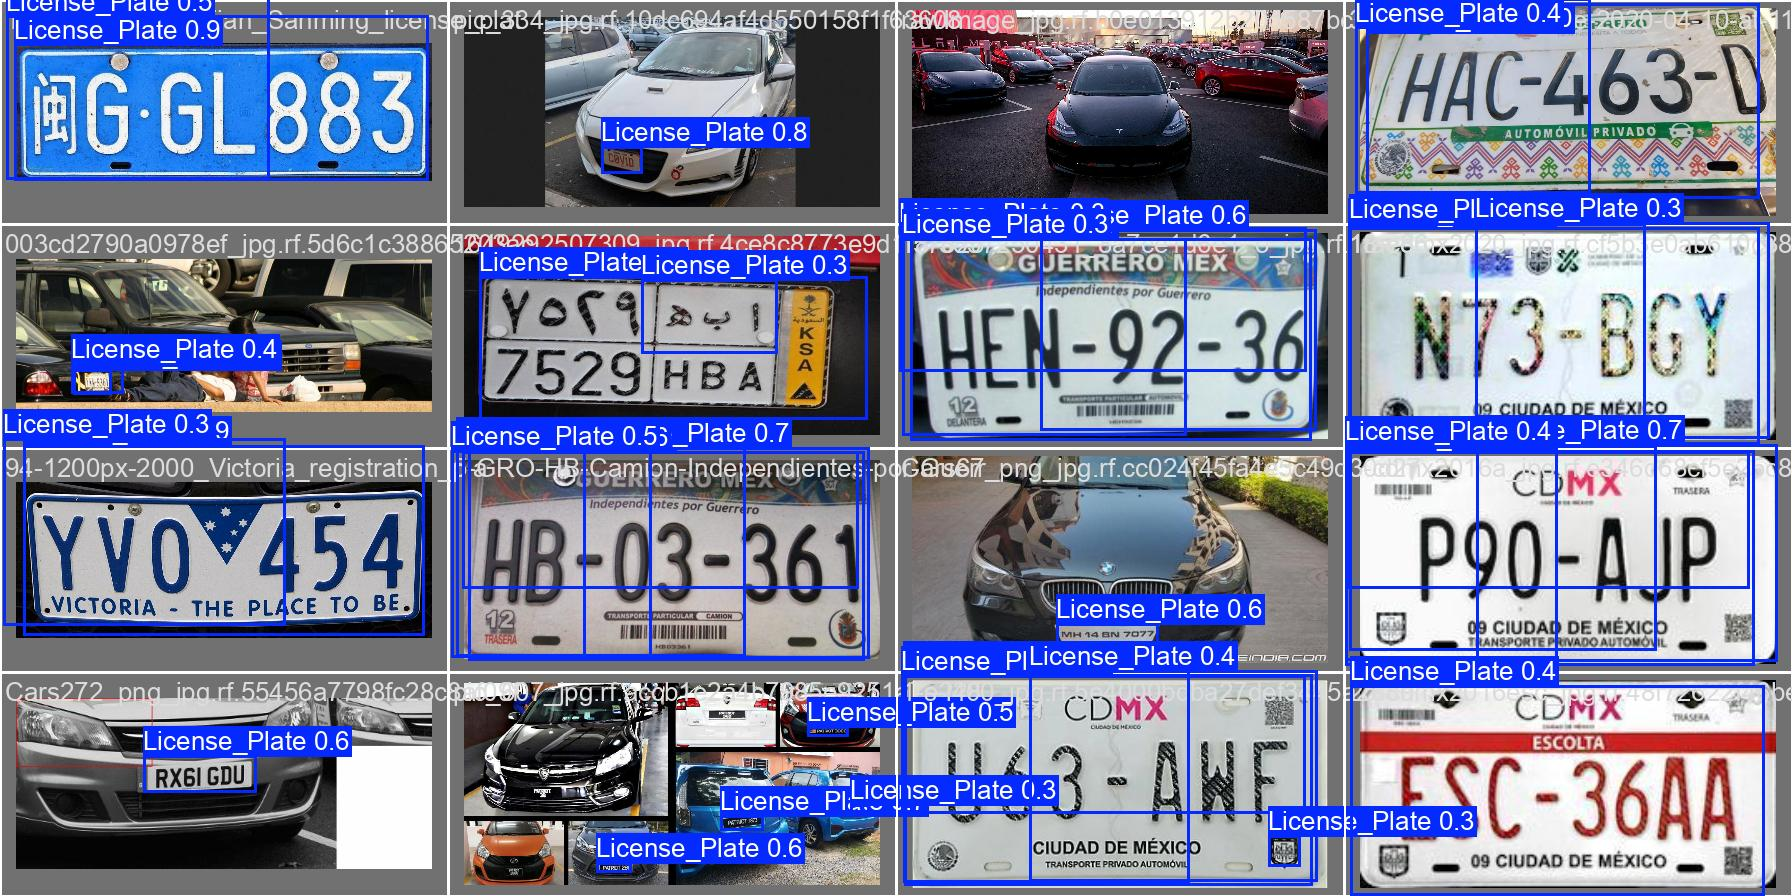

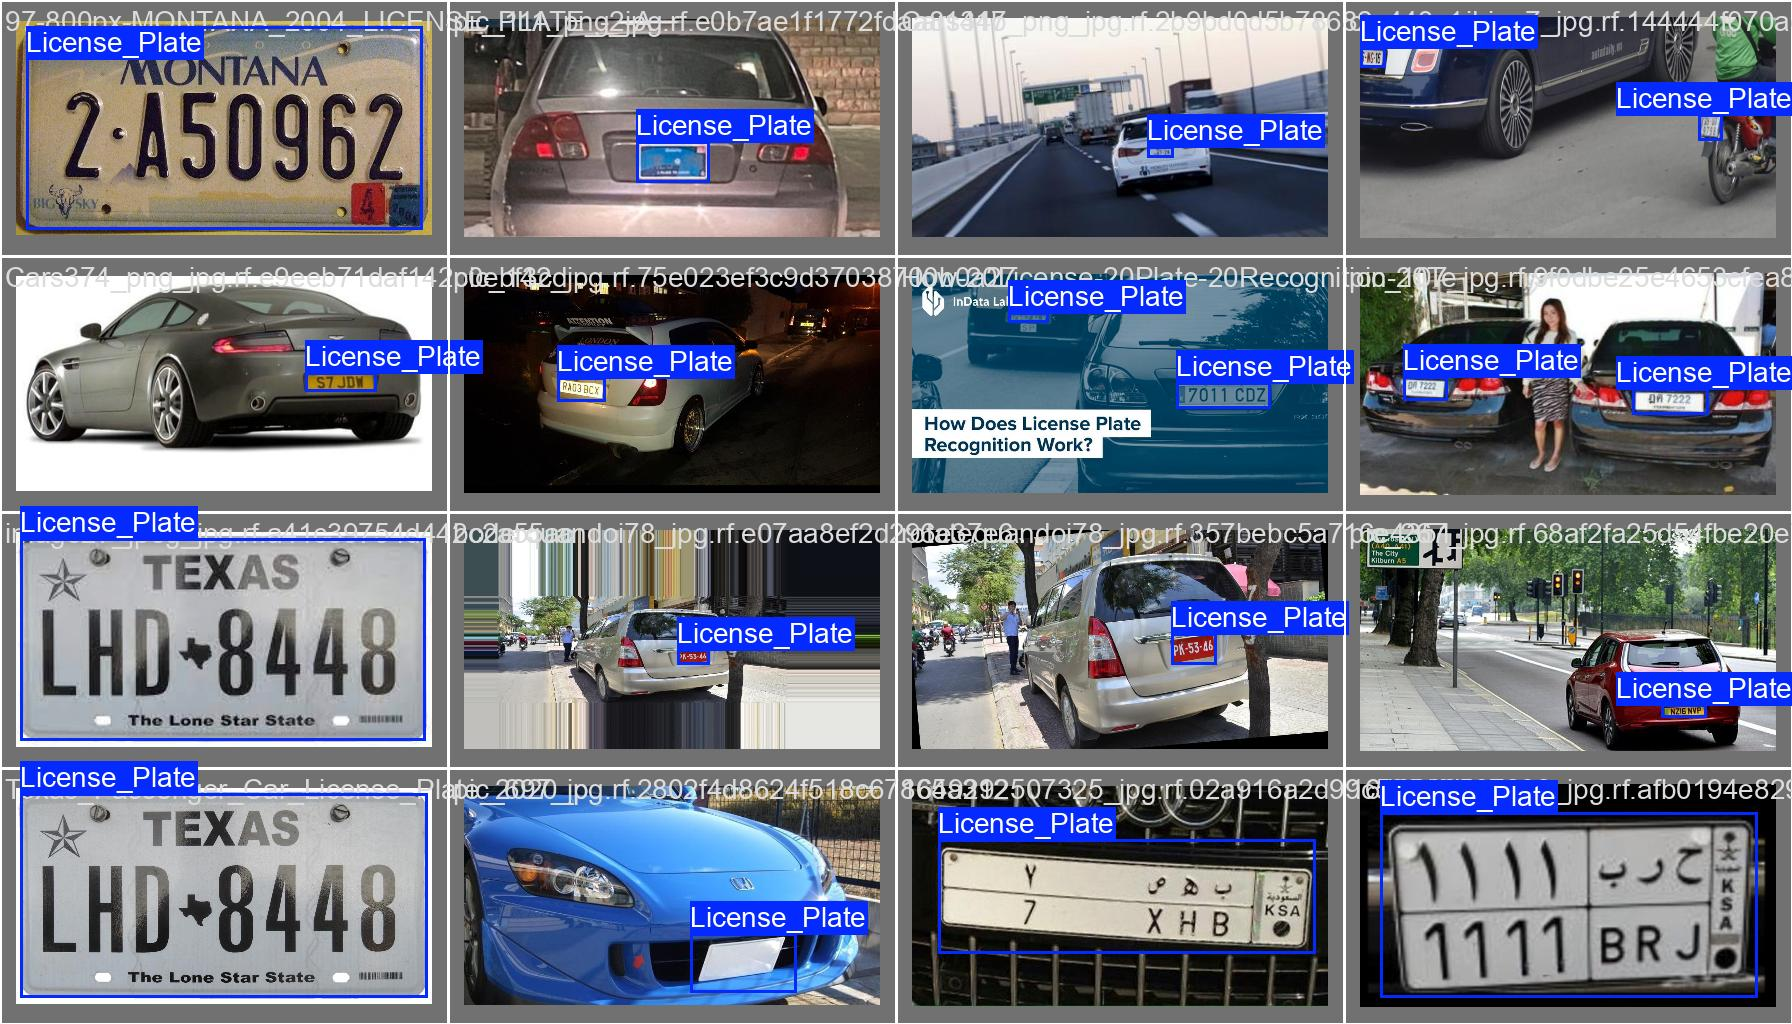

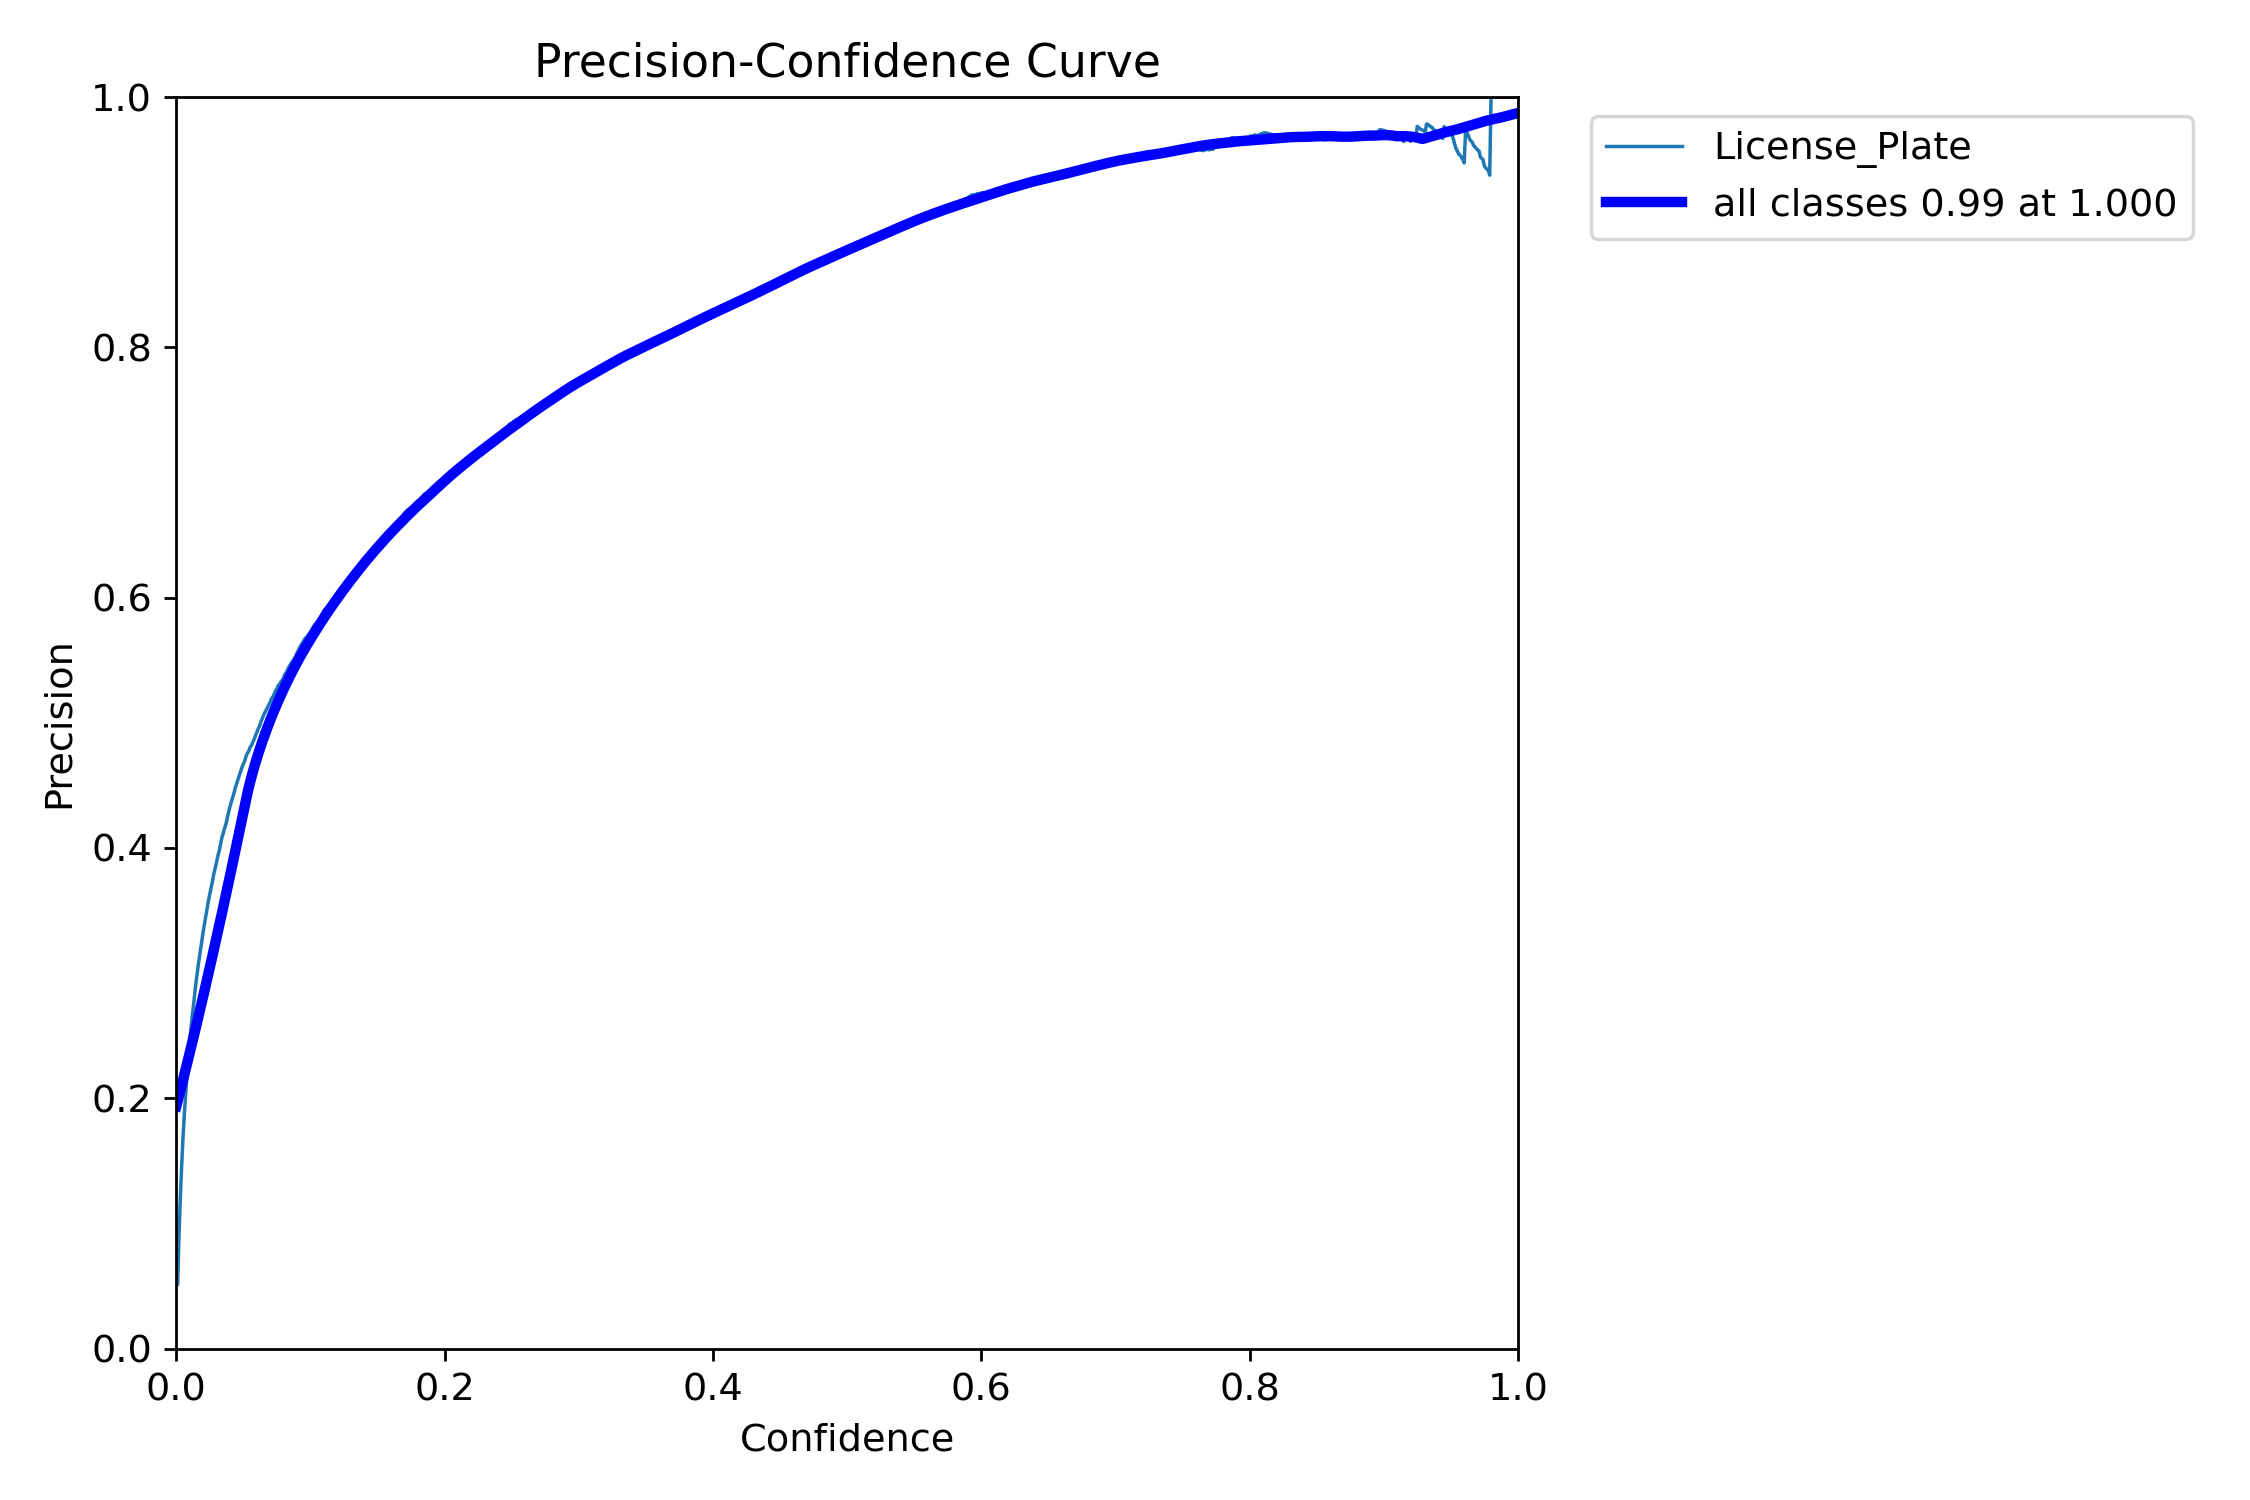

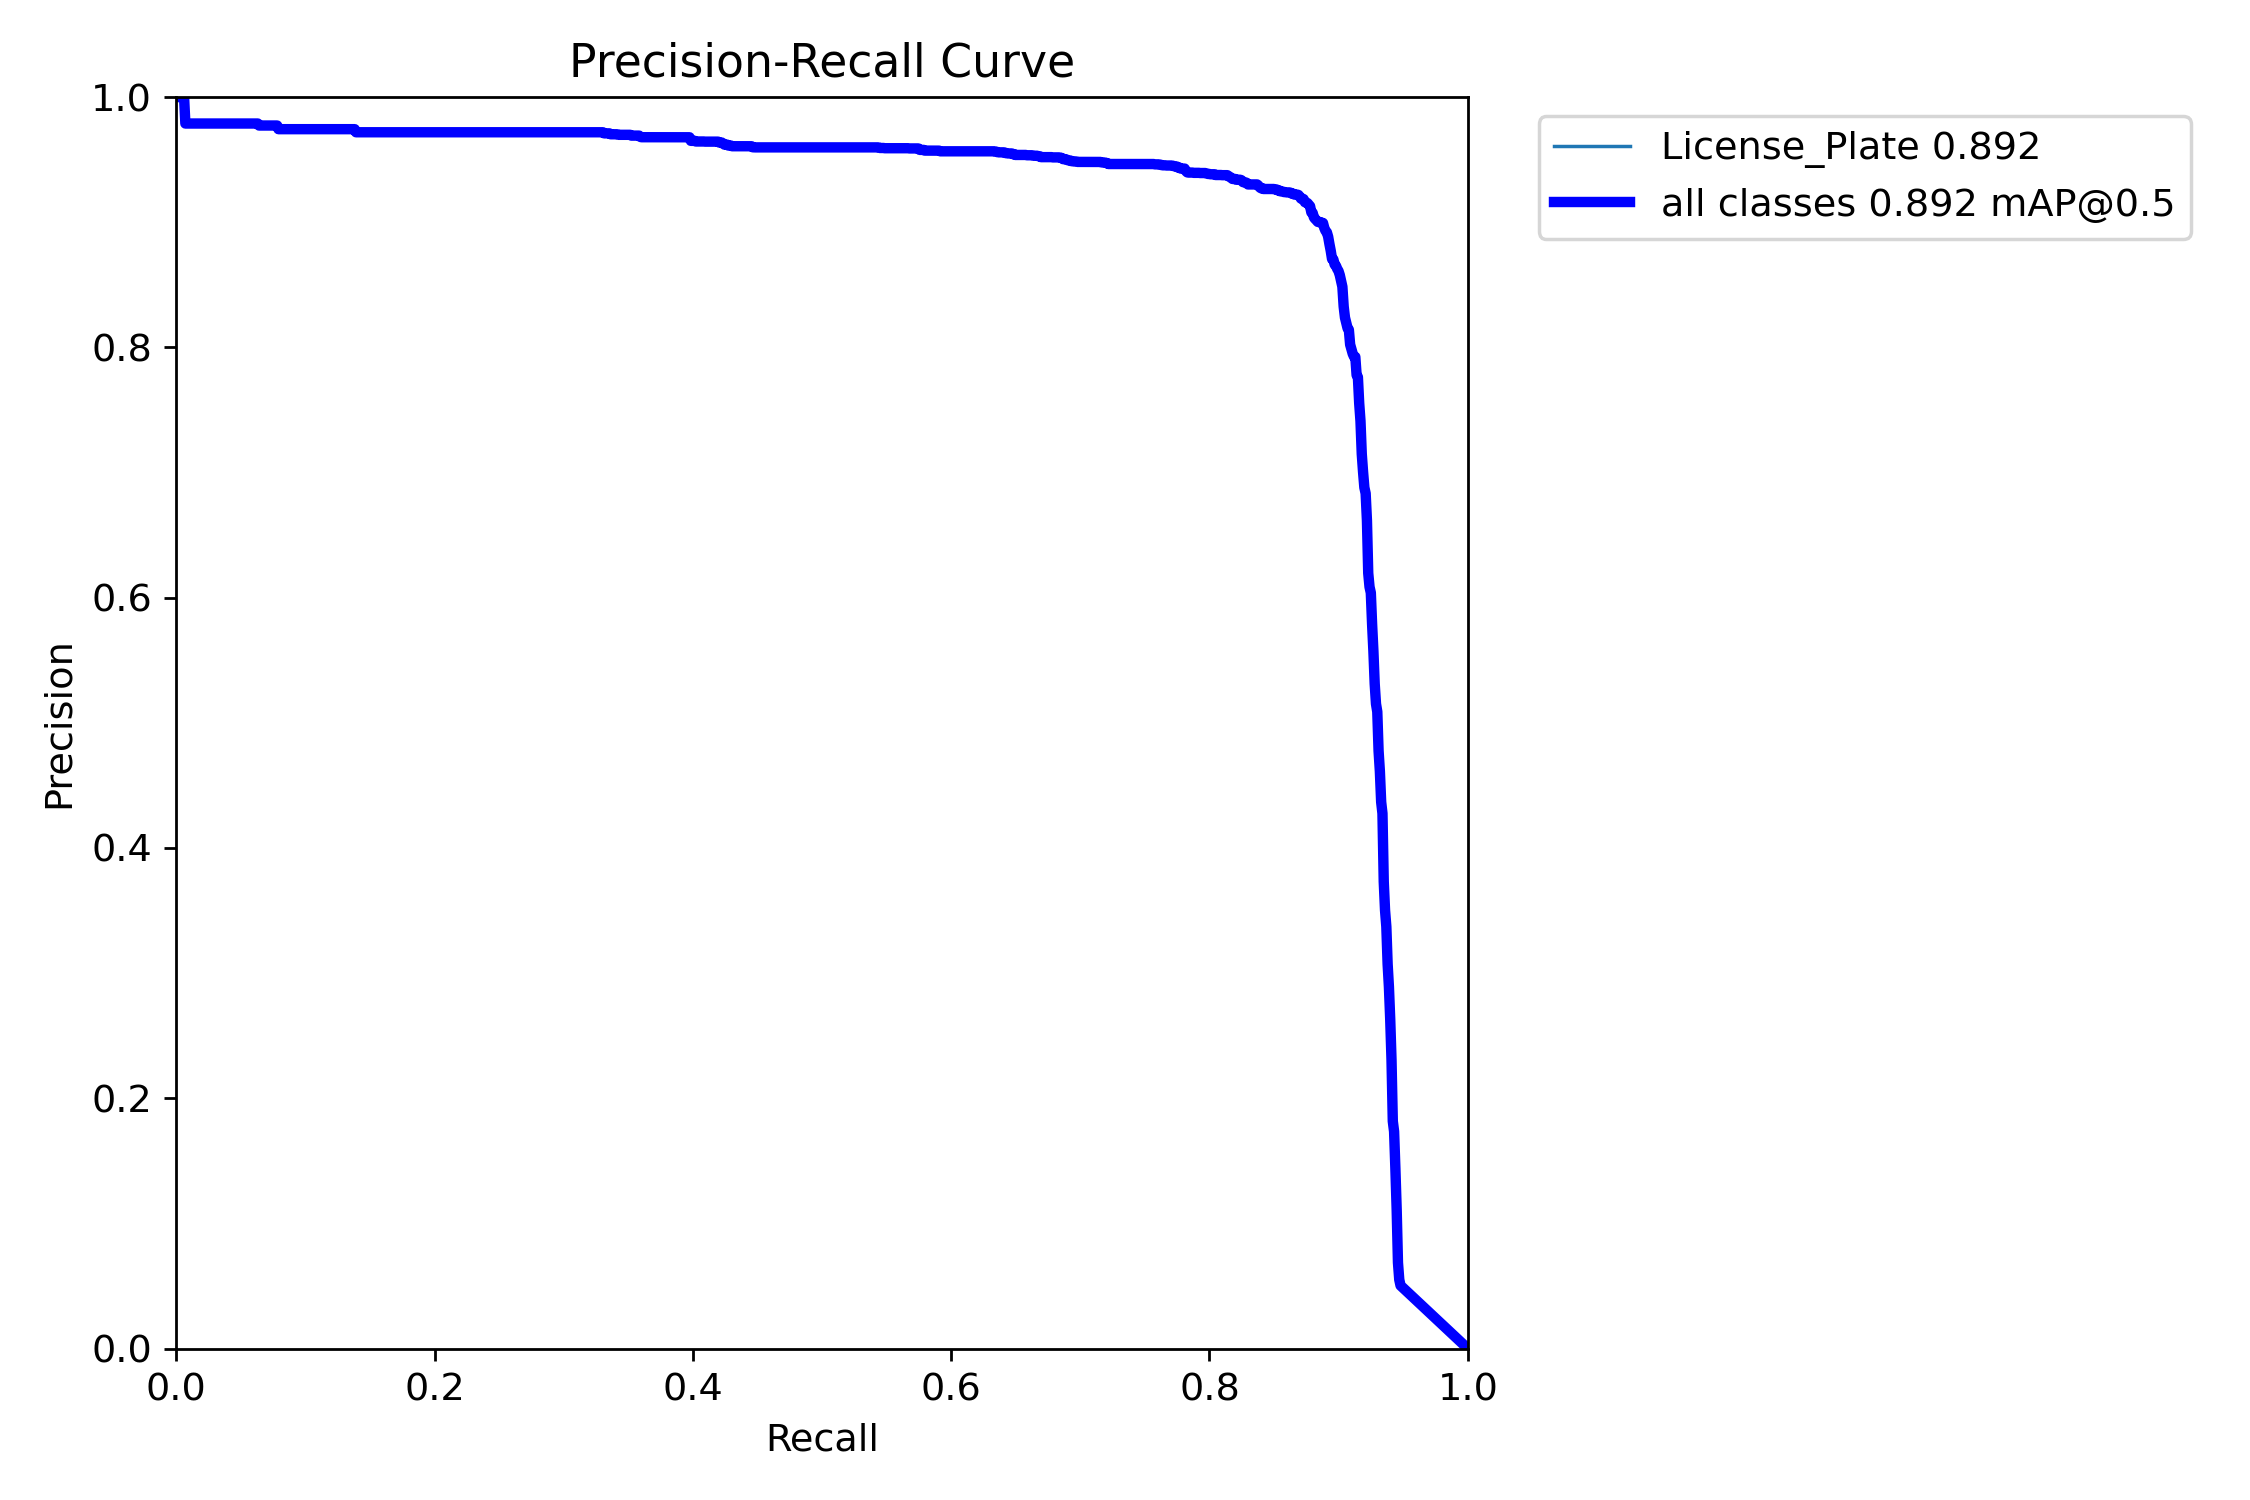

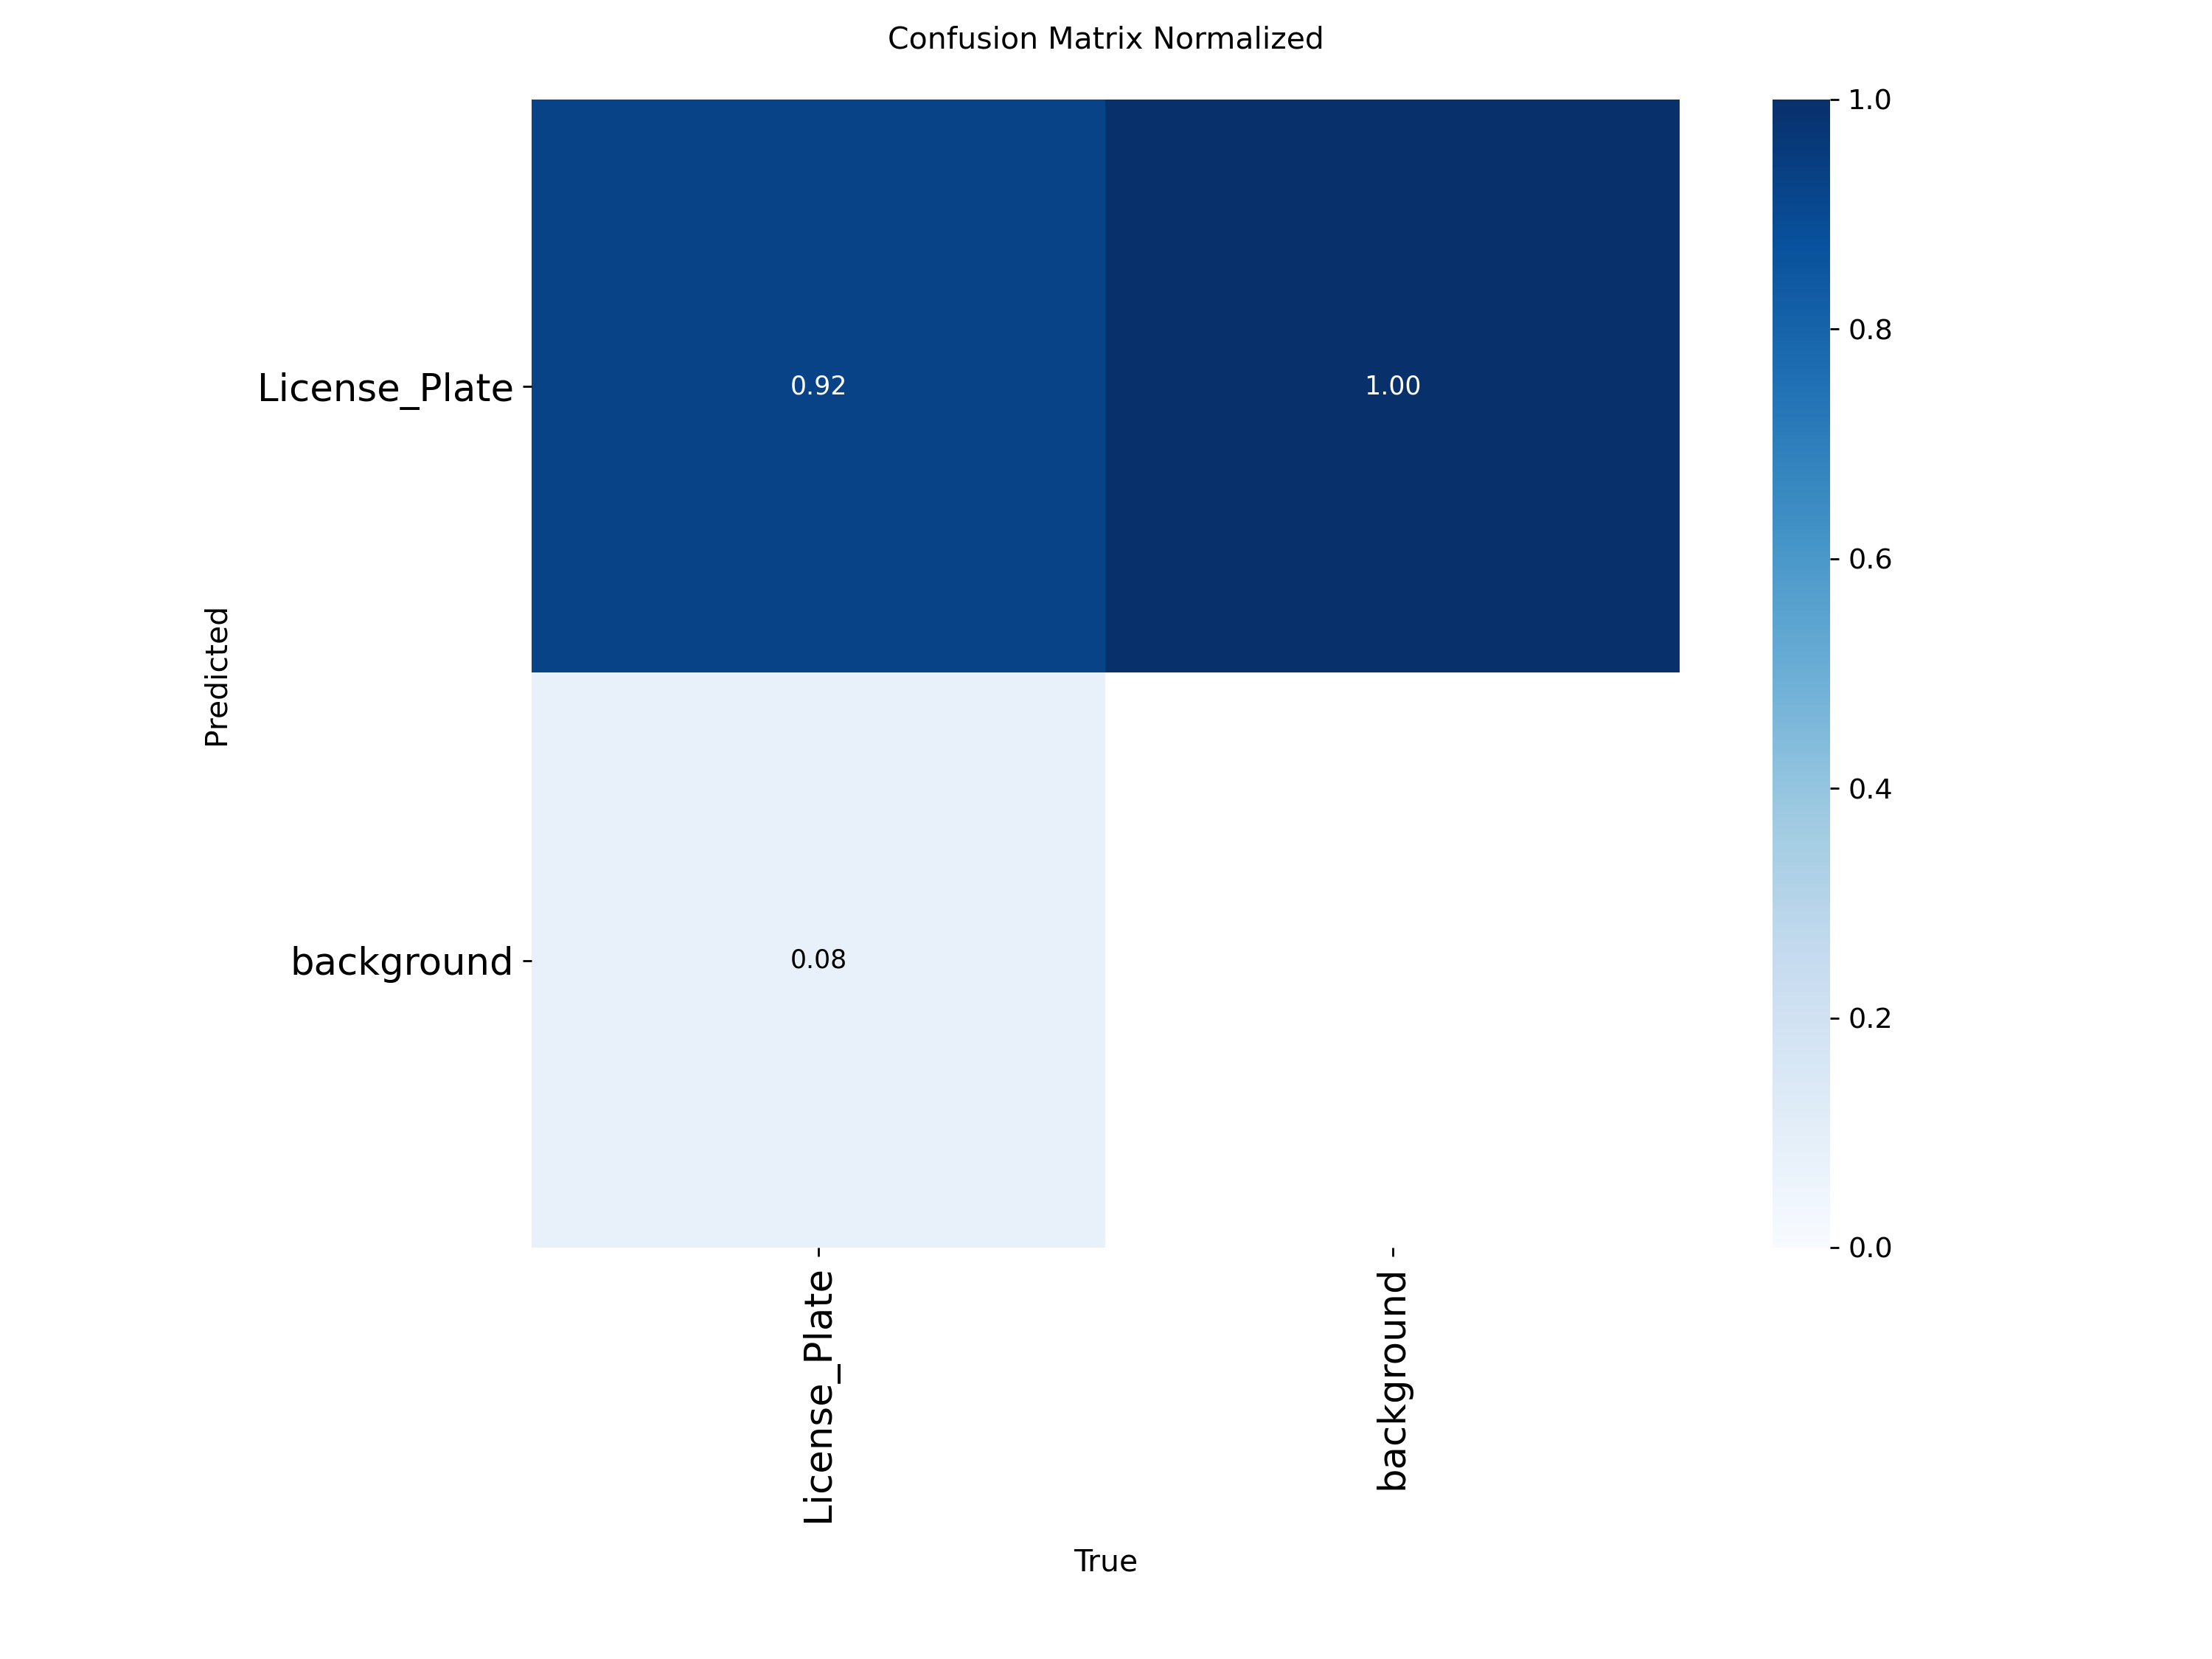

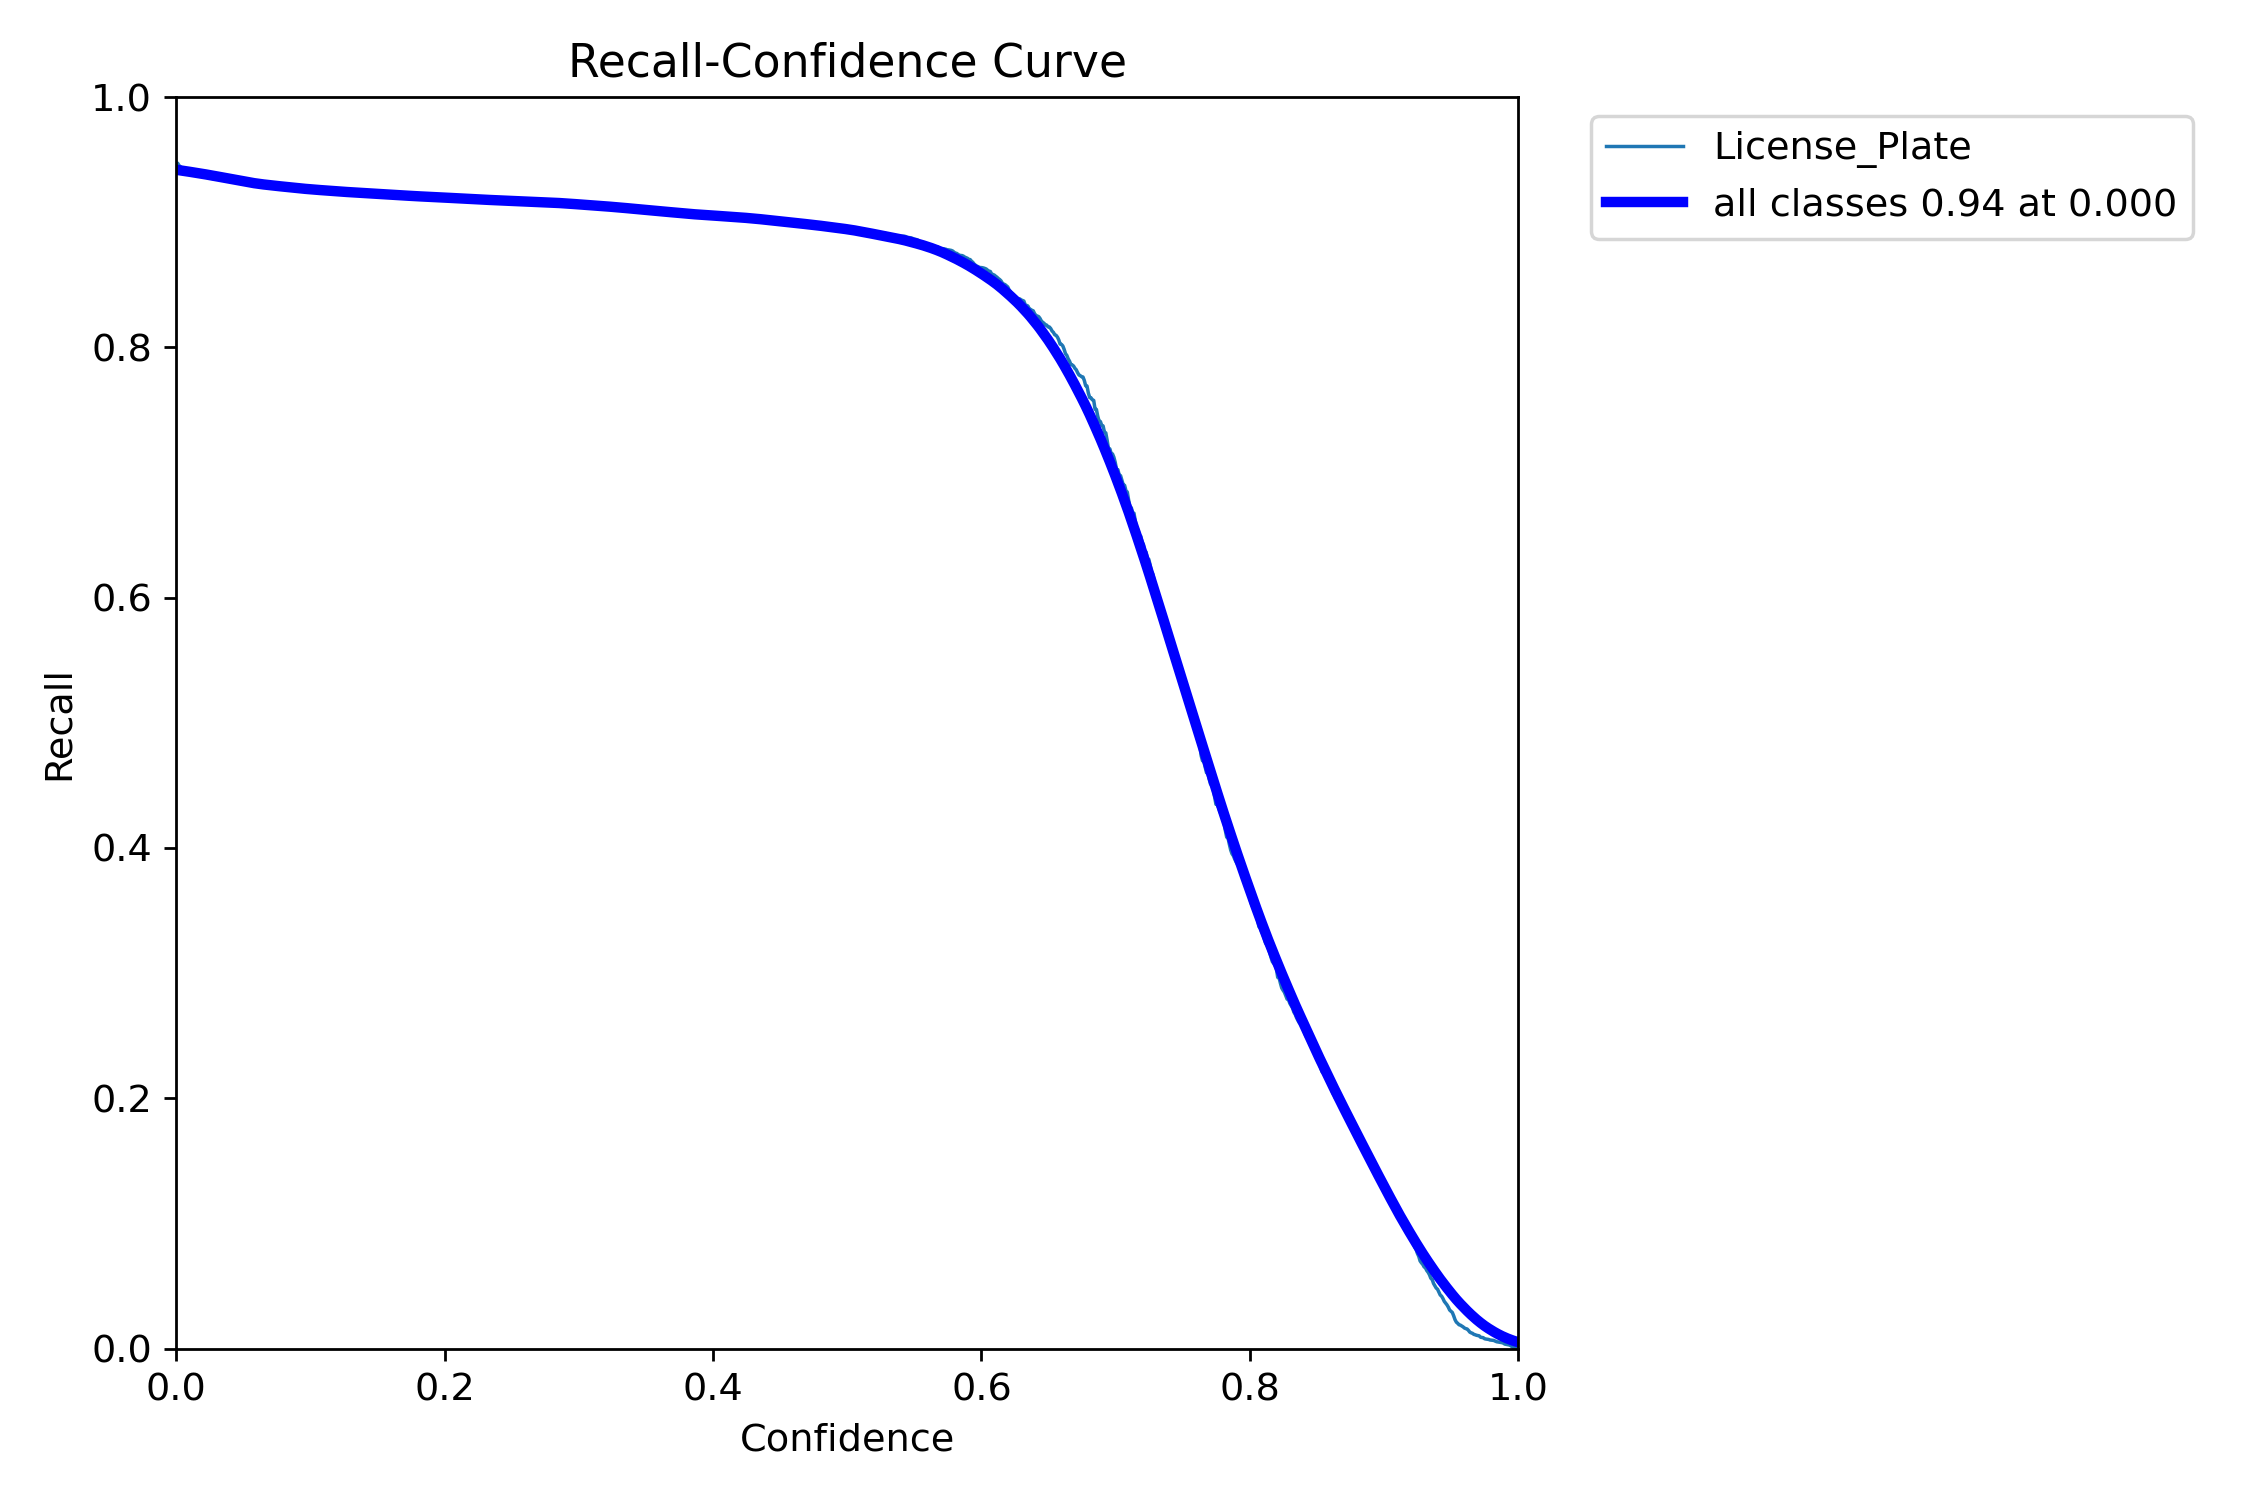

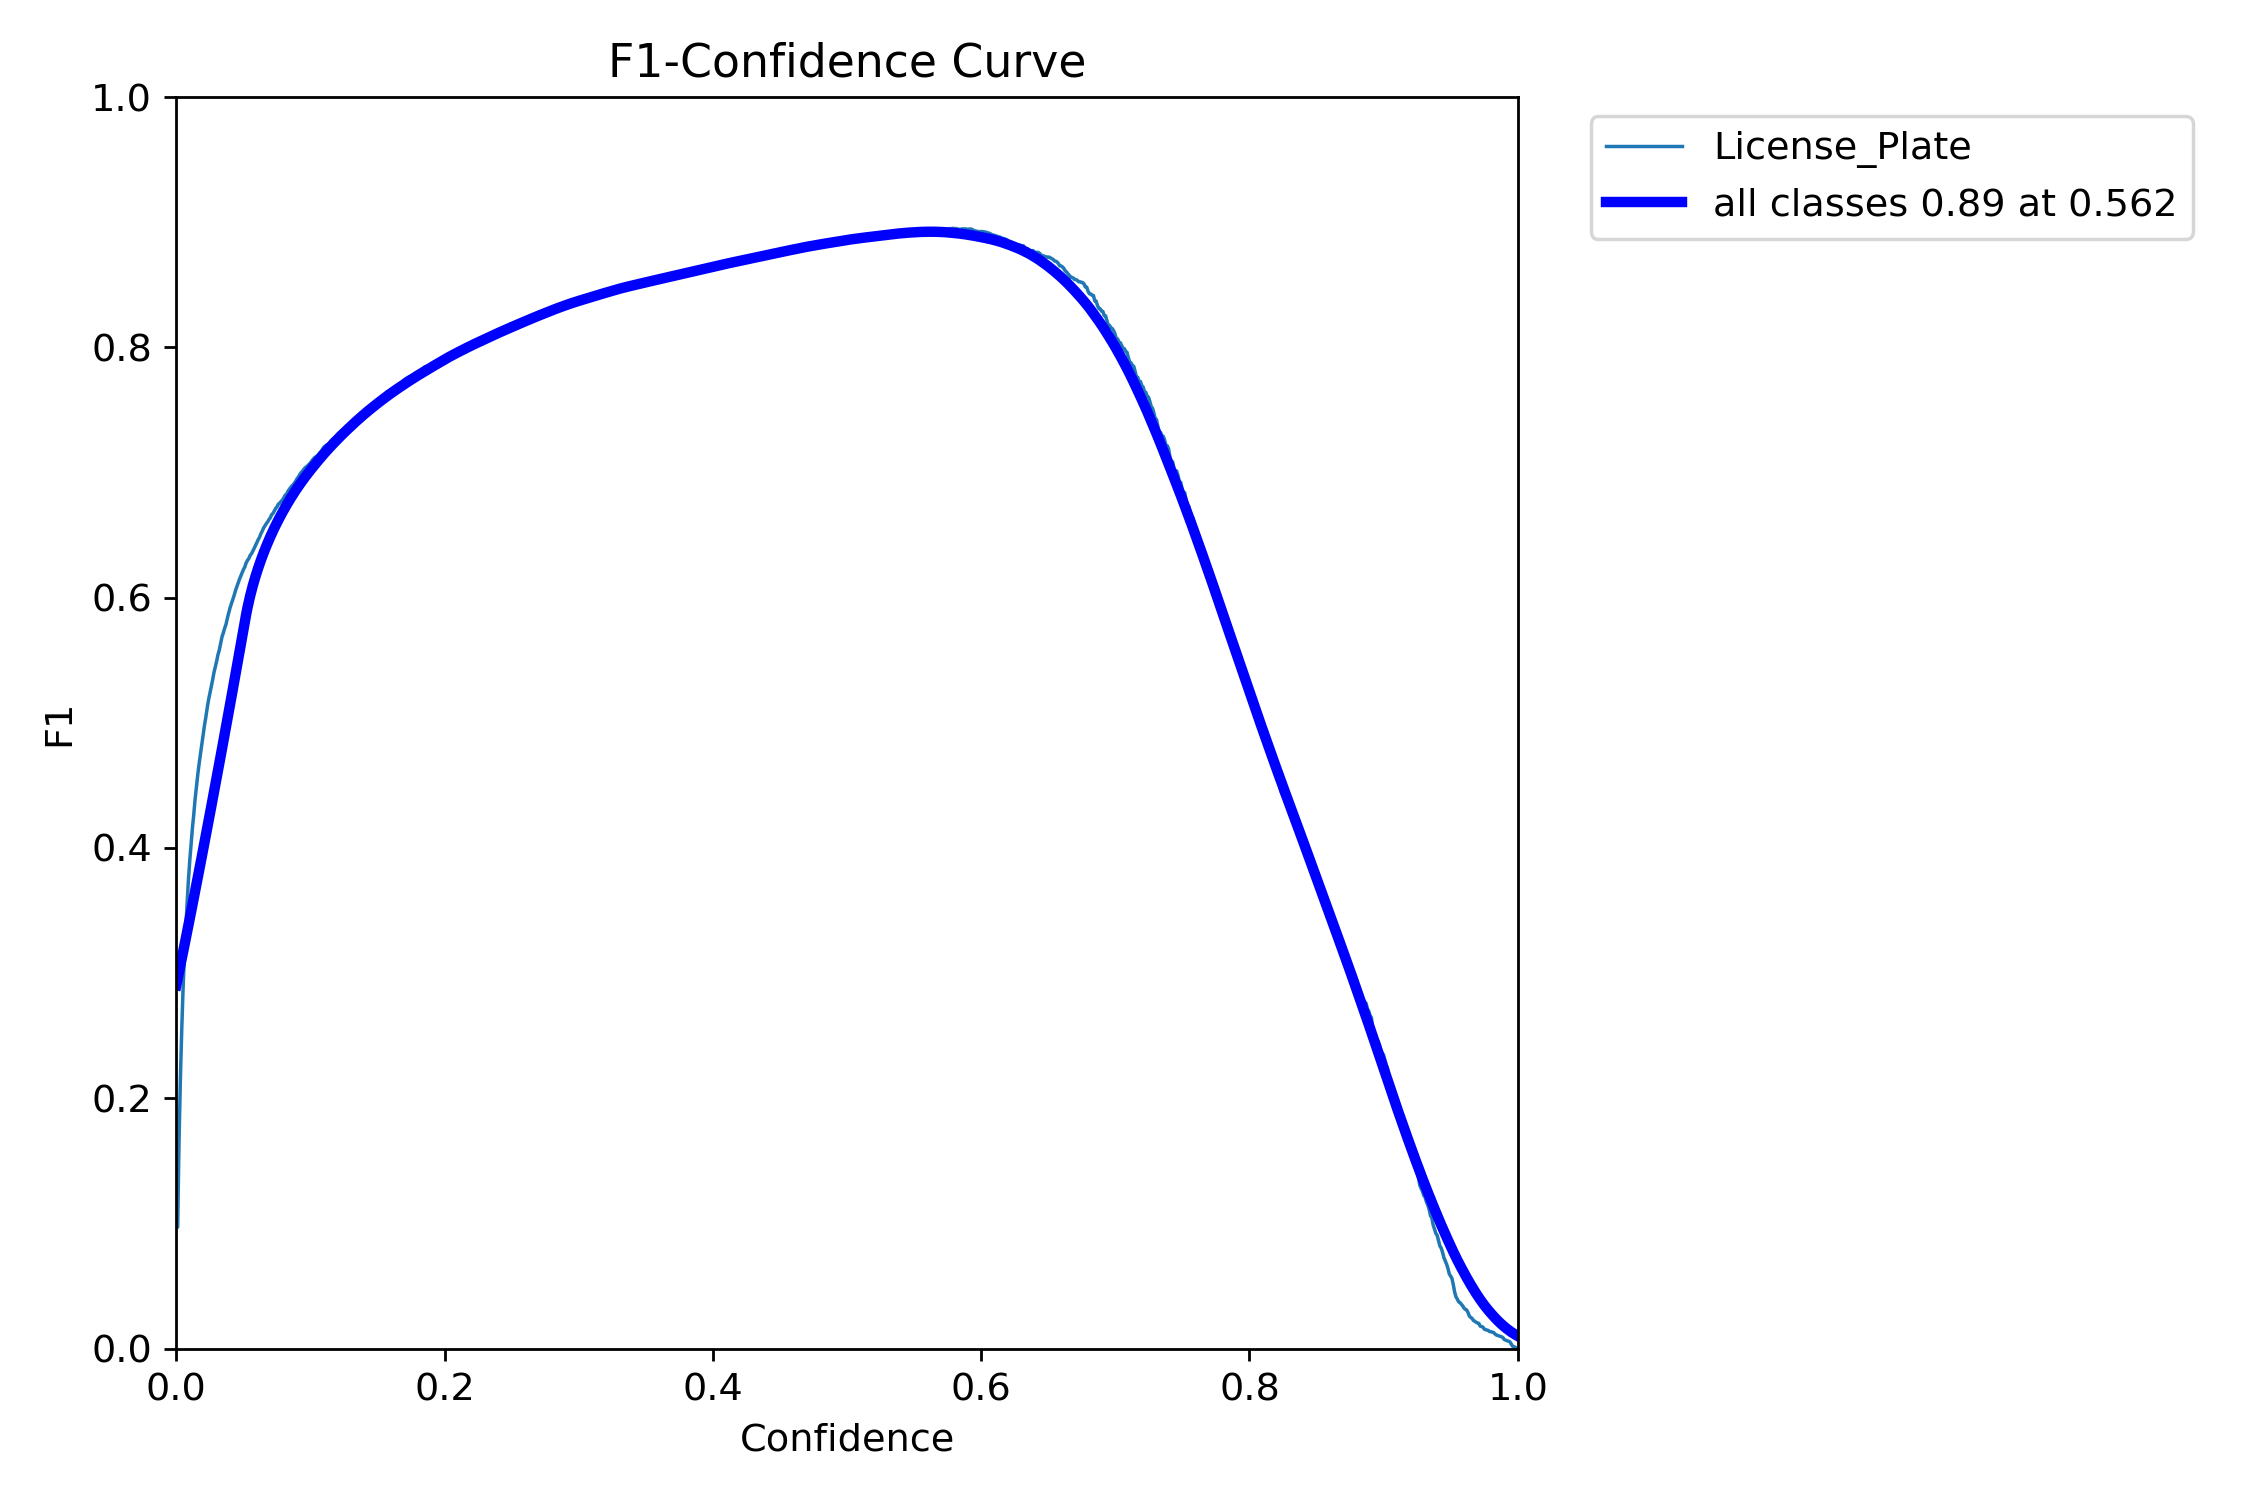

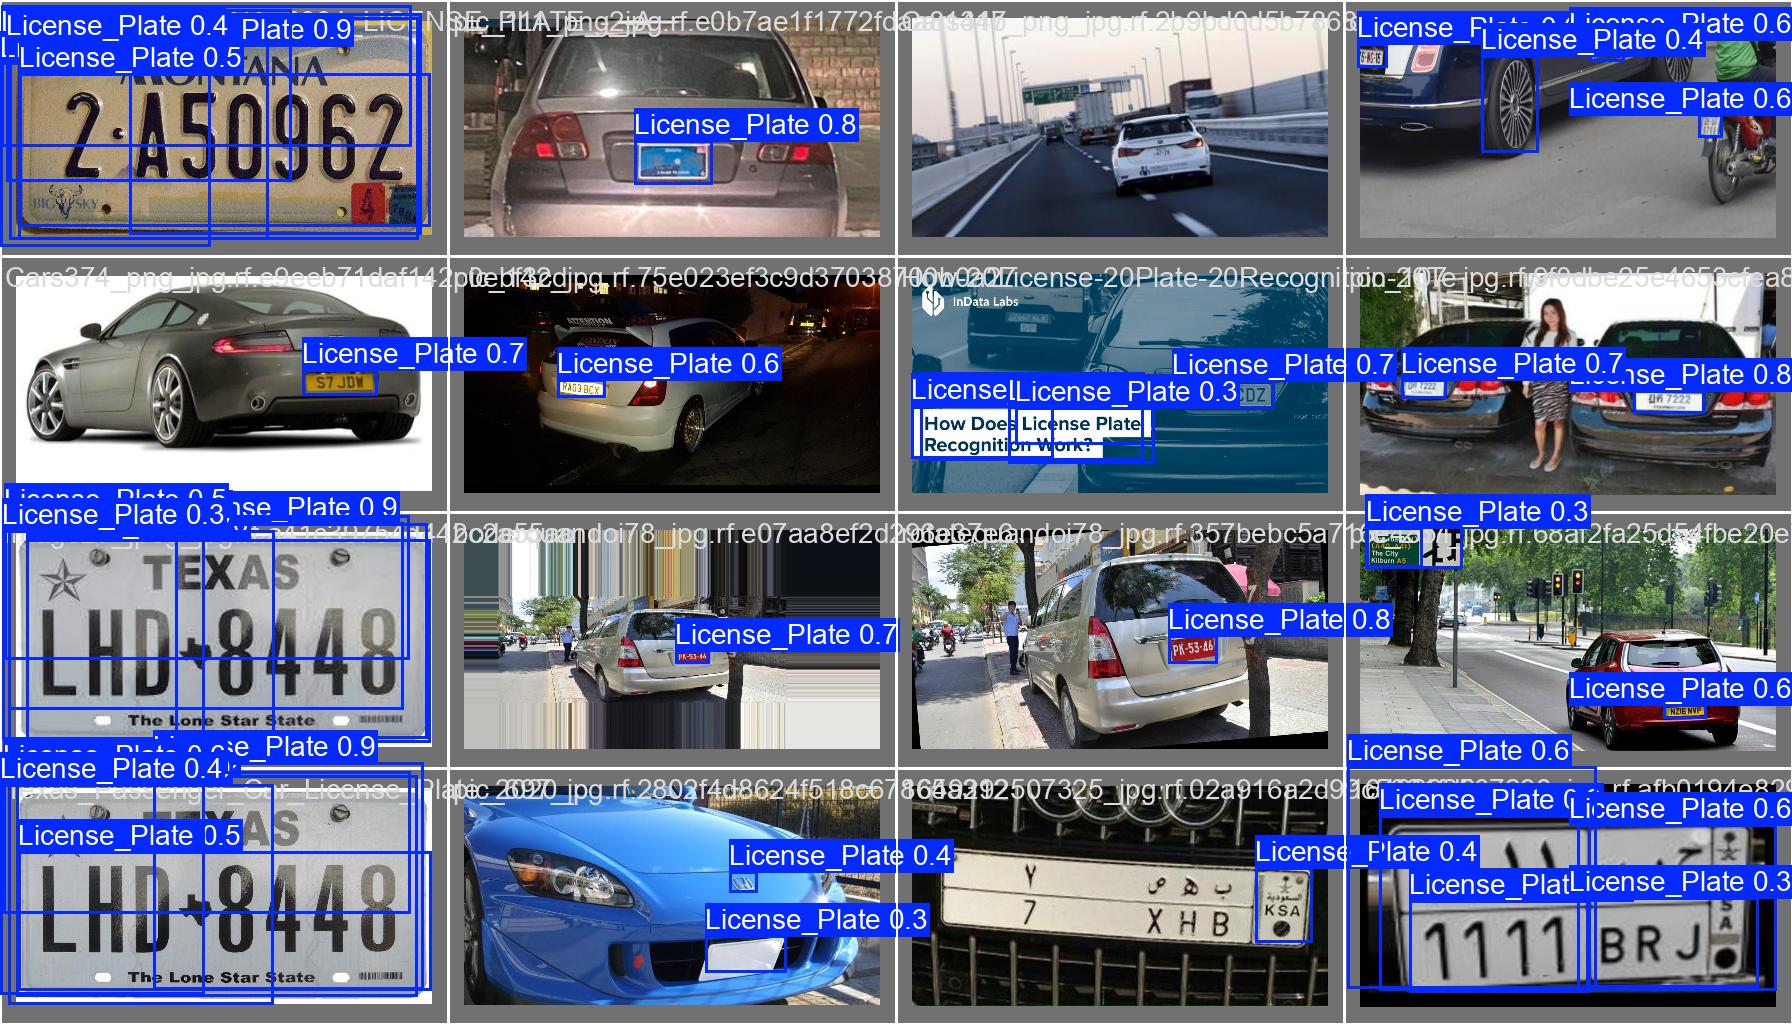

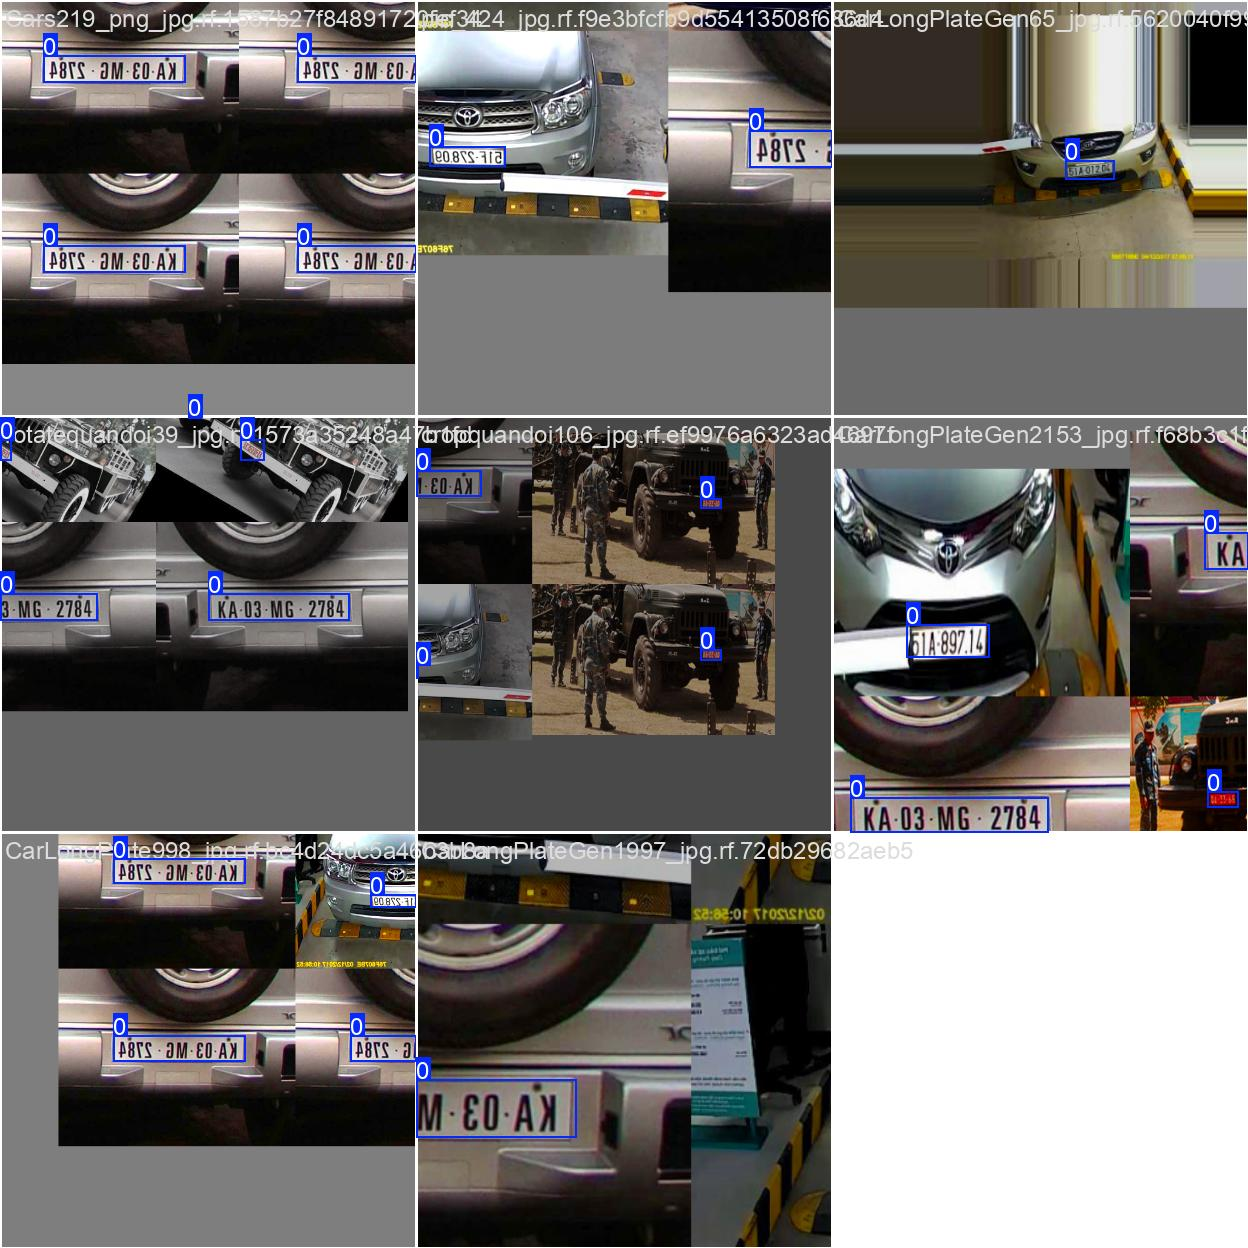

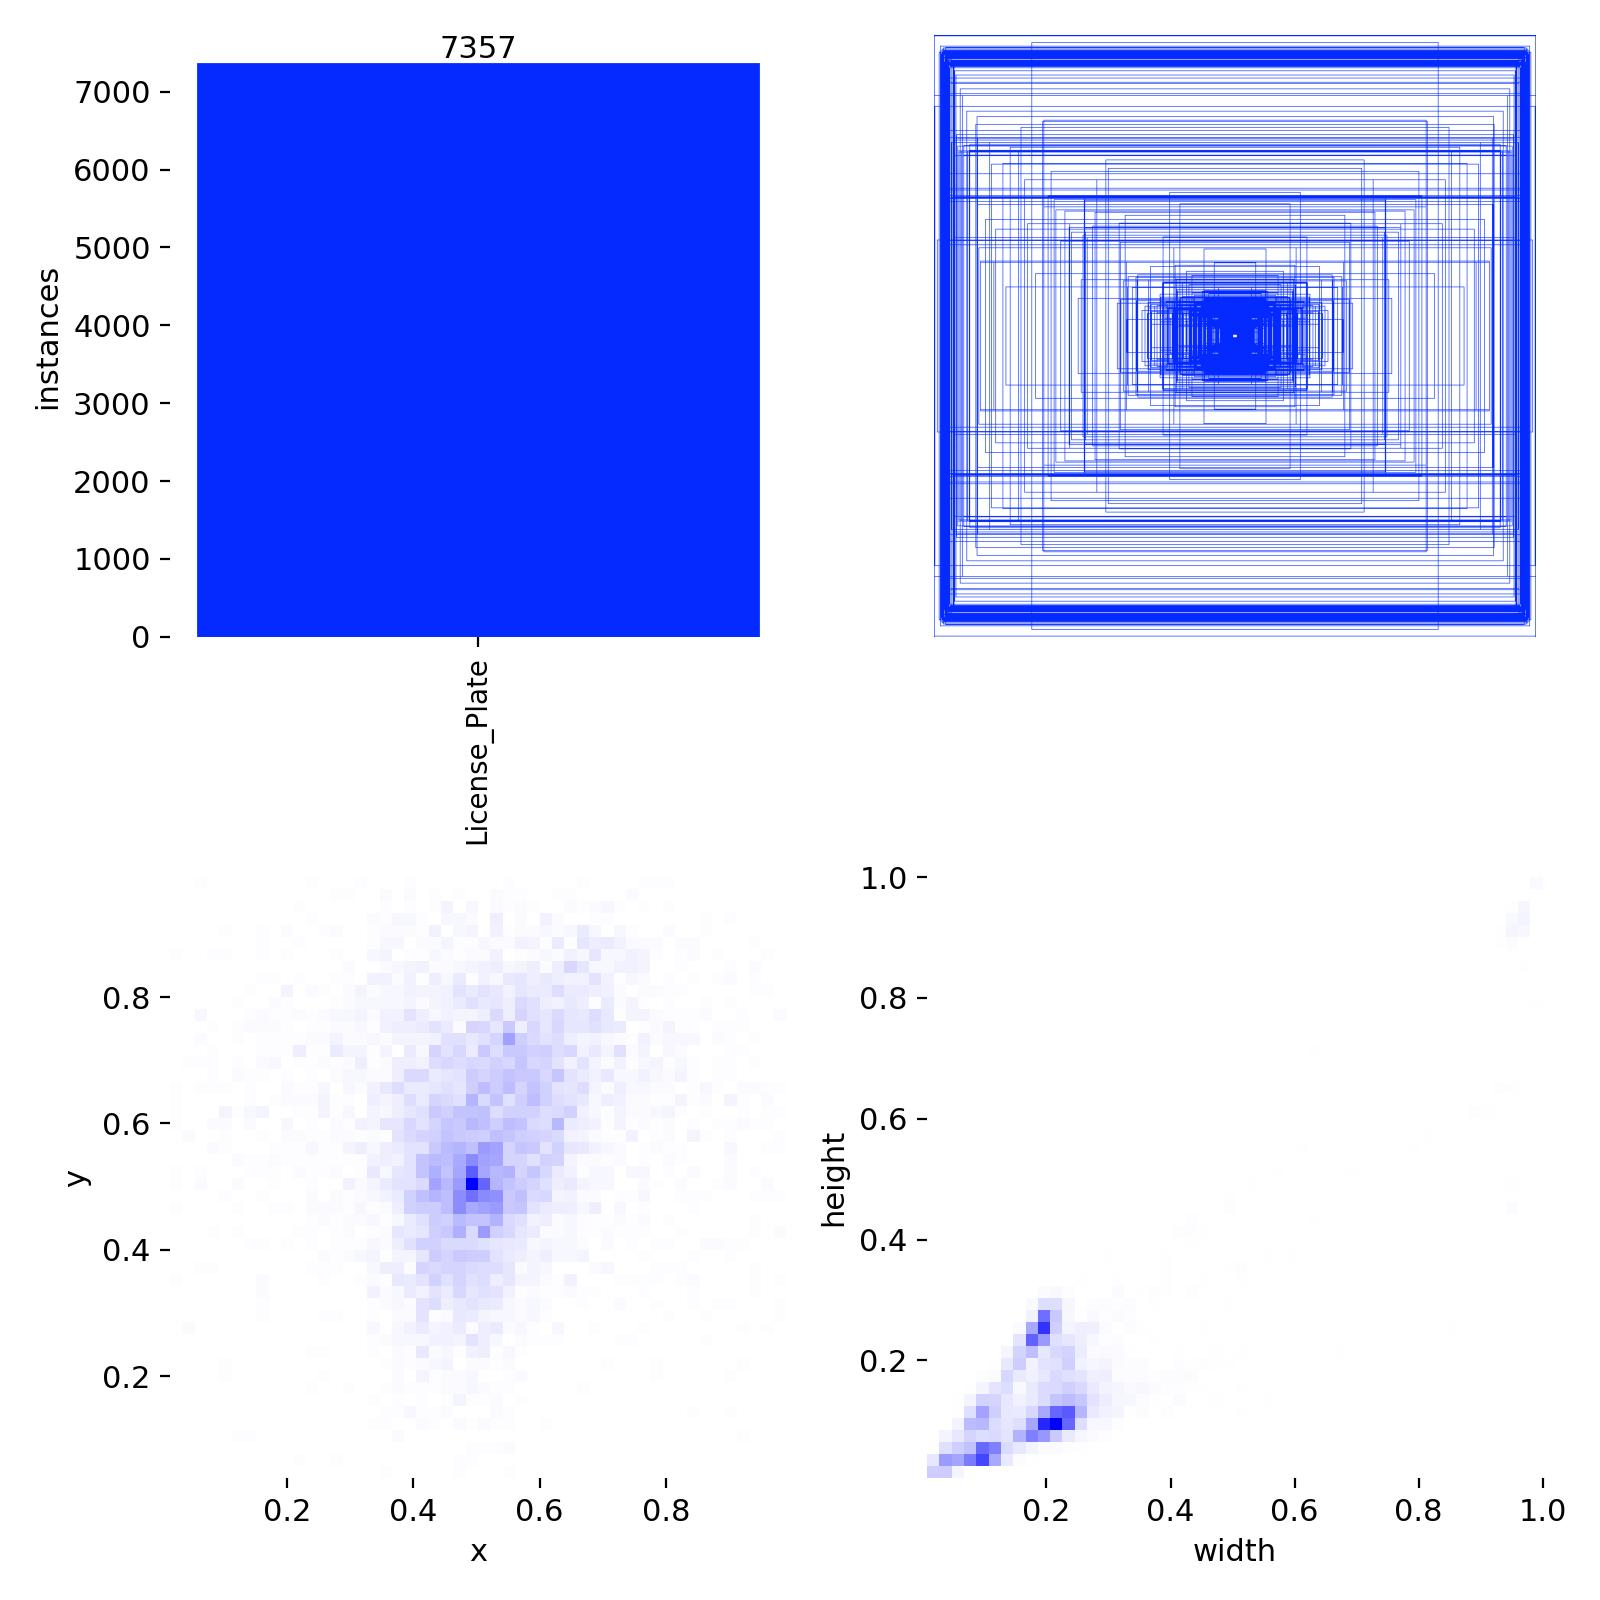

In [17]:
import os
from IPython.display import Image, display

pred_dir = "runs/detect/train"

for filename in os.listdir(pred_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        display(Image(filename=f"{pred_dir}/{filename}", width=600))

# Save Best Weights

We save the trained model weights (`best.pt`) so they can be reused for the demo video or further testing.

In [18]:
!cp runs/detect/train/weights/best.pt /content/best.pt
print("Saved best model as best.pt")

Saved best model as best.pt


# Upload Results to Google Drive

Useful for preserving model weights, predictions, and results when Colab resets.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/best.pt /content/drive/MyDrive/

Mounted at /content/drive


# Conclusion

This notebook successfully demonstrates the complete workflow for building a License Plate Detector using YOLOv8. Through dataset loading, model training, evaluation, and prediction visualization, we implemented a functional computer vision system capable of locating license plates in vehicle images.

The primary goal of this project was to create a working model and show each step clearly, rather than achieve maximum performance. The results confirm that the model can detect license plates with reasonable accuracy, and the pipeline is fully reproducible in Google Colab.

# Testing the Model

In [29]:
# Upload an image

from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
print("Uploaded image:", image_path)

Saving Cars.jpg to Cars (1).jpg
Uploaded image: Cars (1).jpg


In [30]:
# Load the trained model

from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")

# Run prediction on uploaded image
results = model.predict(image_path, save=True)

print("Prediction complete. Saved output in runs/detect/predict/")


image 1/1 /content/Cars (1).jpg: 320x416 3 License_Plates, 6.7ms
Speed: 1.3ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 416)
Results saved to /content/runs/detect/predict3
Prediction complete. Saved output in runs/detect/predict/


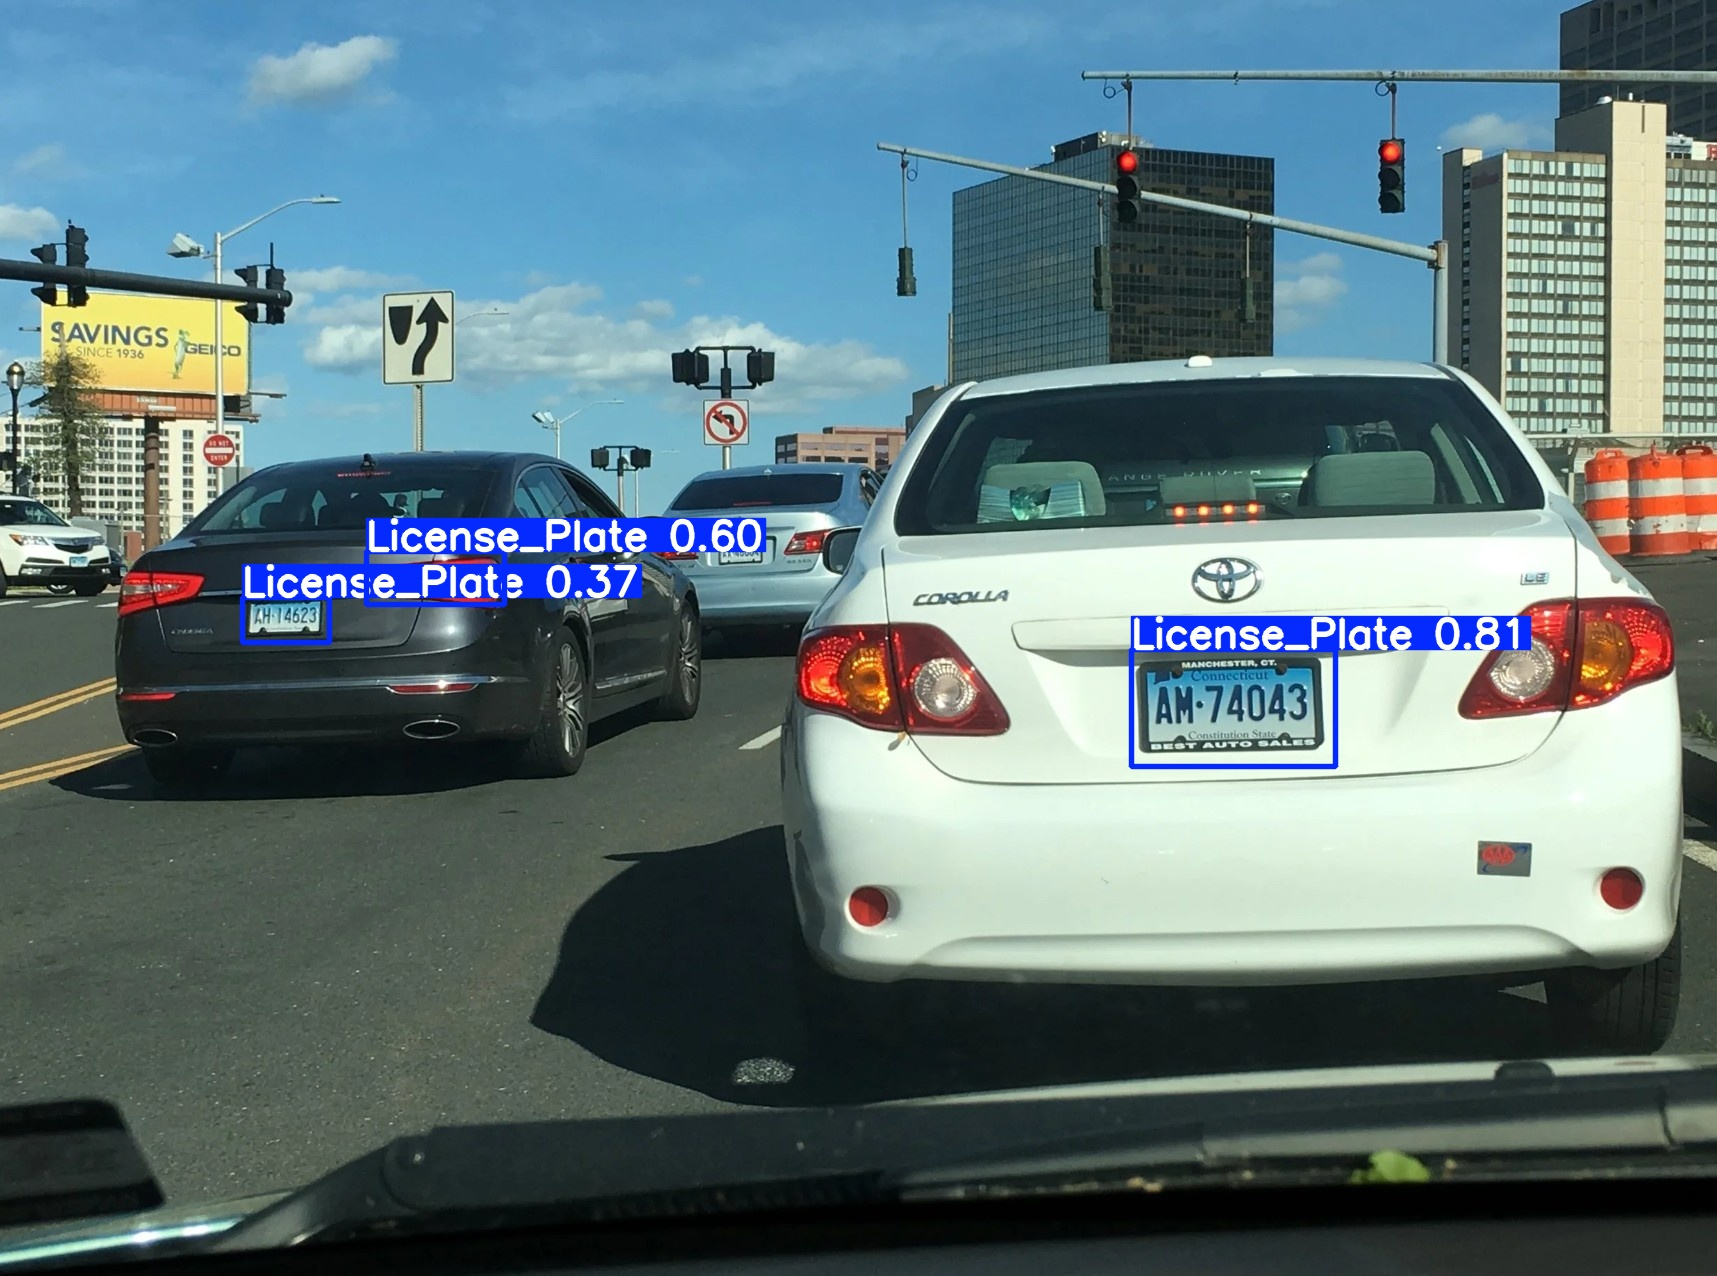

In [31]:
from IPython.display import Image, display
import os

pred_dir = "runs/detect/predict"

# Find the most recent prediction file
pred_images = [f for f in os.listdir(pred_dir) if f.endswith((".jpg", ".png"))]

if pred_images:
    display(Image(filename=f"{pred_dir}/{pred_images[-1]}", width=600))
else:
    print("No prediction image found.")